# Delivery Solutions #

## why are there bad deliveries and how can we fix them? ##

Are there bad sellers?

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data_csv/delivery_solutions.csv')
df.head()

,order_id,seller_id,seller_state,seller_city,order_status,purchase_date,approved_date,carrier_date,customer_date,estimate_date,shipping_limit_date,freight_value,product_weight_g,price,distance,category,delivery_time,delivery_performance,late
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,SP,volta redonda,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09-19 09:45:35,13.29,650.0,58.90,301.229205,cool_stuff,7.0,-8.0,0
1,0036757472ece3dde52fd4bfd929c90e,7c67e1448b00f6e969d365cea6b010ab,SP,itaquaquecetuba,delivered,2018-07-19 14:58:59,2018-07-19 15:10:11,2018-08-07 07:45:00,2018-08-09 14:33:40,2018-08-20 00:00:00,2018-08-08 15:10:11,66.04,15475.0,136.99,307.891649,office_furniture,20.0,-10.0,0
2,0036887767dea4bd43b1a88cd0d9477a,46dc3b2cc0980fb8ec44634e21d2718e,RJ,rio de janeiro,delivered,2017-10-13 00:04:49,2017-10-14 00:07:30,2017-10-17 12:56:45,2017-10-23 19:09:12,2017-11-01 00:00:00,2017-10-19 01:07:30,23.64,8100.0,399.99,341.002270,toys,10.0,-8.0,0
3,00378c6c981f234634c0b9d6128df6dd,218d46b86c1881d022bce9c68a7d4b15,SP,ribeirao preto,delivered,2018-02-02 19:39:46,2018-02-02 19:50:27,2018-02-05 18:06:49,2018-02-26 21:36:00,2018-02-26 00:00:00,2018-02-08 19:50:27,11.85,183.0,41.00,310.710734,sports_leisure,24.0,0.0,1
4,003822434f91204da0a51fe4cf2aba18,c54679b132454625907c773d273d4126,SP,guaruja,delivered,2018-06-13 14:10:54,2018-06-15 02:37:21,2018-06-15 14:48:00,2018-06-19 13:34:35,2018-07-20 00:00:00,2018-06-21 02:30:28,18.58,250.0,69.00,331.169932,perfumery,5.0,-30.0,0


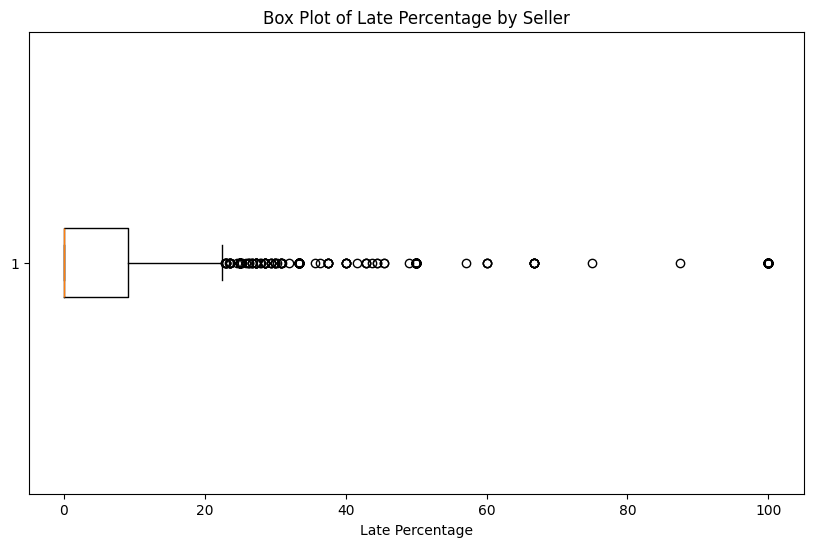

In [11]:
# seller level data
# get seller performance column --> percentage with late =1
seller_performance = df.groupby('seller_id').agg(late_percentage=('late', lambda x: (x.sum() / len(x)) * 100)).reset_index()
plt.figure(figsize=(10, 6))
plt.boxplot(seller_performance['late_percentage'], vert=False)
plt.title('Box Plot of Late Percentage by Seller')
plt.xlabel('Late Percentage')
plt.show()

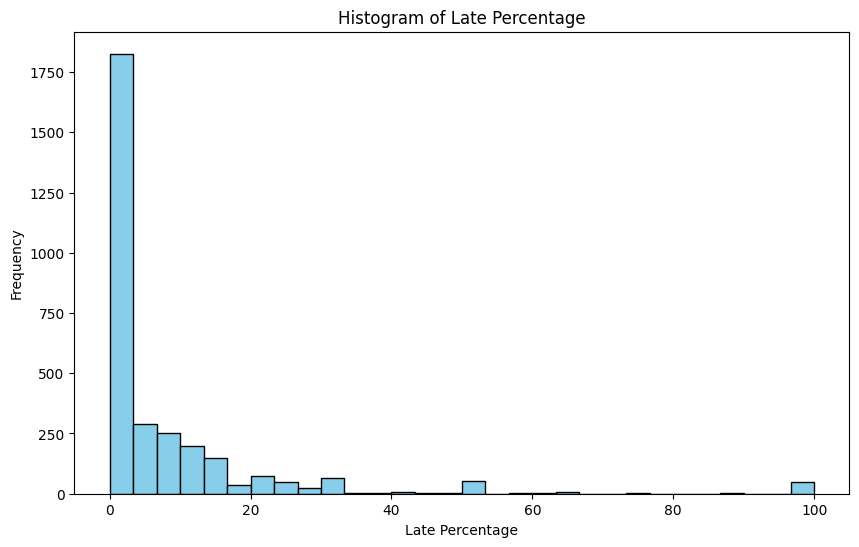

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(seller_performance['late_percentage'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Late Percentage')
plt.xlabel('Late Percentage')
plt.ylabel('Frequency')
plt.show()

In [12]:
percentile_75 = seller_performance['late_percentage'].quantile(0.75)
print(f"75th Percentile of Late Percentage: {percentile_75}")

75th Percentile of Late Percentage: 9.090909090909092


In [13]:
# Filter sellers with late percentage above 10
sellers_above_10 = seller_performance[seller_performance['late_percentage'] > 10]['seller_id']

# Count late orders from these sellers
late_orders_above_10 = df[df['seller_id'].isin(sellers_above_10) & (df['late'] == 1)].shape[0]

# Count total late orders
total_late_orders = df[df['late'] == 1].shape[0]

print(f"Count of late orders from sellers with late percentage above 10: {late_orders_above_10}")
print(f"Total count of late orders: {total_late_orders}")

Count of late orders from sellers with late percentage above 10: 4229
Total count of late orders: 8715


In [17]:
# about half of late orders come from the top 25 percent worst performing sellers.
# Investigate sellers with late percentage above 10
sellers_above_10_data = df[df['seller_id'].isin(sellers_above_10)]

# Group by seller_id and calculate average price, average distance, and average freight value
seller_stats = sellers_above_10_data.groupby('seller_id').agg(
    avg_price=('price', 'mean'),
    avg_distance=('distance', 'mean'),
    avg_freight_value=('freight_value', 'mean'),
    avg_weight=('product_weight_g', 'mean')
).reset_index()

print(seller_stats.describe())
# Investigate sellers with late percentage 10 or below
sellers_below_10_data = df[~df['seller_id'].isin(sellers_above_10)]

# Group by seller_id and calculate average price, average distance, and average freight value
seller_stats_below_10 = sellers_below_10_data.groupby('seller_id').agg(
    avg_price=('price', 'mean'),
    avg_distance=('distance', 'mean'),
    avg_freight_value=('freight_value', 'mean'),
    avg_weight=('product_weight_g', 'mean')
).reset_index()

print(seller_stats_below_10.describe())

         avg_price  avg_distance  avg_freight_value    avg_weight
count   703.000000    701.000000         703.000000    703.000000
mean    192.317179    601.934508          24.127704   3033.441840
std     365.779336    335.861453          17.914982   4301.403208
min      10.900000     12.159315           7.390000    103.385027
25%      59.095572    395.263852          15.100875    526.969697
50%     102.289474    553.705541          18.560000   1198.717949
75%     194.528947    744.387762          25.704464   3478.421569
max    6729.000000   2495.434210         193.210000  30000.000000
         avg_price  avg_distance  avg_freight_value    avg_weight
count  2392.000000   2387.000000        2392.000000   2392.000000
mean    171.625089    615.871652          23.160403   2388.145283
std     308.076072    409.657576          19.251588   4111.449341
min       3.500000      1.135905           1.200000     50.000000
25%      50.491402    366.744976          14.605105    414.482143
50%      9

The profiles for the bad performers and good performers are remarkably similar. We should check if any locations are biased on one group compared to the other. Some locations may have worse carrier options. If they are similar, a good recommendation would be to have them change carriers.
The weight is higher in the late group, but the freight values are similar. Perhaps it is worth increasing the freight price to ensure the delivery is on time.

In [16]:
# Calculate state percentages for sellers above 10%
states_above_10 = sellers_above_10_data['seller_state'].value_counts(normalize=True) * 100

# Calculate state percentages for sellers below 10%
states_below_10 = sellers_below_10_data['seller_state'].value_counts(normalize=True) * 100

# Display the results
print("State Percentages for Sellers Above 10%:")
print(states_above_10)

print("\nState Percentages for Sellers Below 10%:")
print(states_below_10)

# Find the difference in state percentages between the two groups
state_difference = states_above_10.subtract(states_below_10, fill_value=0)

# Display the results
print("\nDifference in State Percentages (Above 10% - Below 10%):")
print(state_difference)

State Percentages for Sellers Above 10%:
seller_state
SP    81.095871
PR     6.401936
MG     3.672782
RJ     3.055390
SC     2.308205
MA     1.420704
DF     0.561266
RS     0.473568
BA     0.368331
ES     0.164872
GO     0.115761
CE     0.112253
MS     0.066650
PB     0.056127
RN     0.056127
PE     0.031571
PA     0.028063
AM     0.010524
Name: proportion, dtype: float64

State Percentages for Sellers Below 10%:
seller_state
SP    68.008034
MG     9.246164
PR     8.136149
RJ     4.690824
SC     4.060944
RS     2.452967
DF     0.878267
BA     0.639388
GO     0.578777
PE     0.521731
ES     0.386247
MT     0.172326
CE     0.073684
RN     0.047538
MS     0.036842
PB     0.026146
RO     0.016638
PI     0.014261
SE     0.011885
AC     0.001188
Name: proportion, dtype: float64

Difference in State Percentages (Above 10% - Below 10%):
seller_state
AC    -0.001188
AM     0.010524
BA    -0.271057
CE     0.038569
DF    -0.317001
ES    -0.221375
GO    -0.463016
MA     1.420704
MG    -5.573382
MS

There is a location bias towards Sao Paolo when they are late. Perhaps carrier options are worse there

/var/folders/vc/ydqs1m4s6w35gmq4jfdzwvxw0000gn/T/ipykernel_9398/3154639574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellers_above_10_data['shipping_limit_date'] = pd.to_datetime(sellers_above_10_data['shipping_limit_date'])
/var/folders/vc/ydqs1m4s6w35gmq4jfdzwvxw0000gn/T/ipykernel_9398/3154639574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellers_above_10_data['carrier_date'] = pd.to_datetime(sellers_above_10_data['carrier_date'])
/var/folders/vc/ydqs1m4s6w35gmq4jfdzwvxw0000gn/T/ipykern

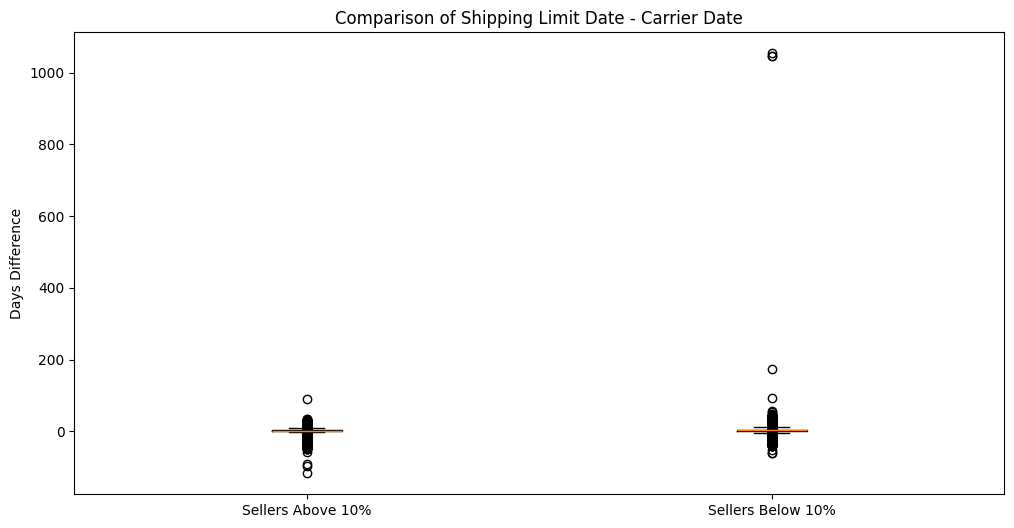

In [9]:
# Convert dates to datetime format
sellers_above_10_data['shipping_limit_date'] = pd.to_datetime(sellers_above_10_data['shipping_limit_date'])
sellers_above_10_data['carrier_date'] = pd.to_datetime(sellers_above_10_data['carrier_date'])

sellers_below_10_data['shipping_limit_date'] = pd.to_datetime(sellers_below_10_data['shipping_limit_date'])
sellers_below_10_data['carrier_date'] = pd.to_datetime(sellers_below_10_data['carrier_date'])

# Calculate the difference in days
sellers_above_10_data['shipping_vs_carrier'] = (sellers_above_10_data['shipping_limit_date'] - sellers_above_10_data['carrier_date']).dt.days
sellers_below_10_data['shipping_vs_carrier'] = (sellers_below_10_data['shipping_limit_date'] - sellers_below_10_data['carrier_date']).dt.days

# Plot the comparison
plt.figure(figsize=(12, 6))
plt.boxplot([sellers_above_10_data['shipping_vs_carrier'].dropna(), sellers_below_10_data['shipping_vs_carrier'].dropna()],
            labels=['Sellers Above 10%', 'Sellers Below 10%'])
plt.title('Comparison of Shipping Limit Date - Carrier Date')
plt.ylabel('Days Difference')
plt.show()

In [26]:
# Convert purchase_date to datetime if not already
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['estimate_date'] = pd.to_datetime(df['estimate_date'])
df['estimate_length'] = df['estimate_date'] - df['purchase_date']

# Group by year and month, and calculate the counts
monthly_counts = df.groupby(df['purchase_date'].dt.to_period('M')).size()

# Filter months with counts >= 50
valid_months = monthly_counts[monthly_counts >= 50].index

# Filter the dataframe to include only valid months
filtered_df = df[df['purchase_date'].dt.to_period('M').isin(valid_months)]

# Group by year and month, and calculate the monthly averages
monthly_averages = filtered_df.groupby(filtered_df['purchase_date'].dt.to_period('M')).agg(
    avg_weight=('product_weight_g', 'mean'),
    avg_distance=('distance', 'mean'),
    avg_price=('price', 'mean'),
    avg_delivery_performance=('delivery_performance', 'mean'),
    avg_freight_cost=('freight_value', 'mean'),
    avg_estimate_length= ('estimate_length', 'mean'),
    avg_delivery_time = ('delivery_time', 'mean'),
    avg_late = ('late', 'mean')
).reset_index()

# Convert the period to a datetime object for better handling
monthly_averages['purchase_date'] = monthly_averages['purchase_date'].dt.to_timestamp()

print(monthly_averages)

   purchase_date   avg_weight  avg_distance   avg_price  \
0     2016-10-01  2282.344353    660.396583  136.384738   
1     2017-01-01  2184.197065    630.191358  125.982063   
2     2017-02-01  2454.046643    648.153981  126.757058   
3     2017-03-01  2268.422422    646.252788  124.781433   
4     2017-04-01  2315.680986    674.589189  134.101054   
5     2017-05-01  2259.576402    629.380681  122.357626   
6     2017-06-01  2283.535475    580.422446  120.859224   
7     2017-07-01  2380.875360    610.179627  110.208338   
8     2017-08-01  2191.803586    628.060237  116.898509   
9     2017-09-01  2180.826744    648.421083  129.248953   
10    2017-10-01  2075.623262    632.459275  124.806357   
11    2017-11-01  2104.685401    605.751698  116.592195   
12    2017-12-01  2045.127457    586.025658  117.931860   
13    2018-01-01  2173.226121    596.325563  115.744440   
14    2018-02-01  1910.660975    614.199577  110.033721   
15    2018-03-01  2149.535475    596.755649  119.656011 

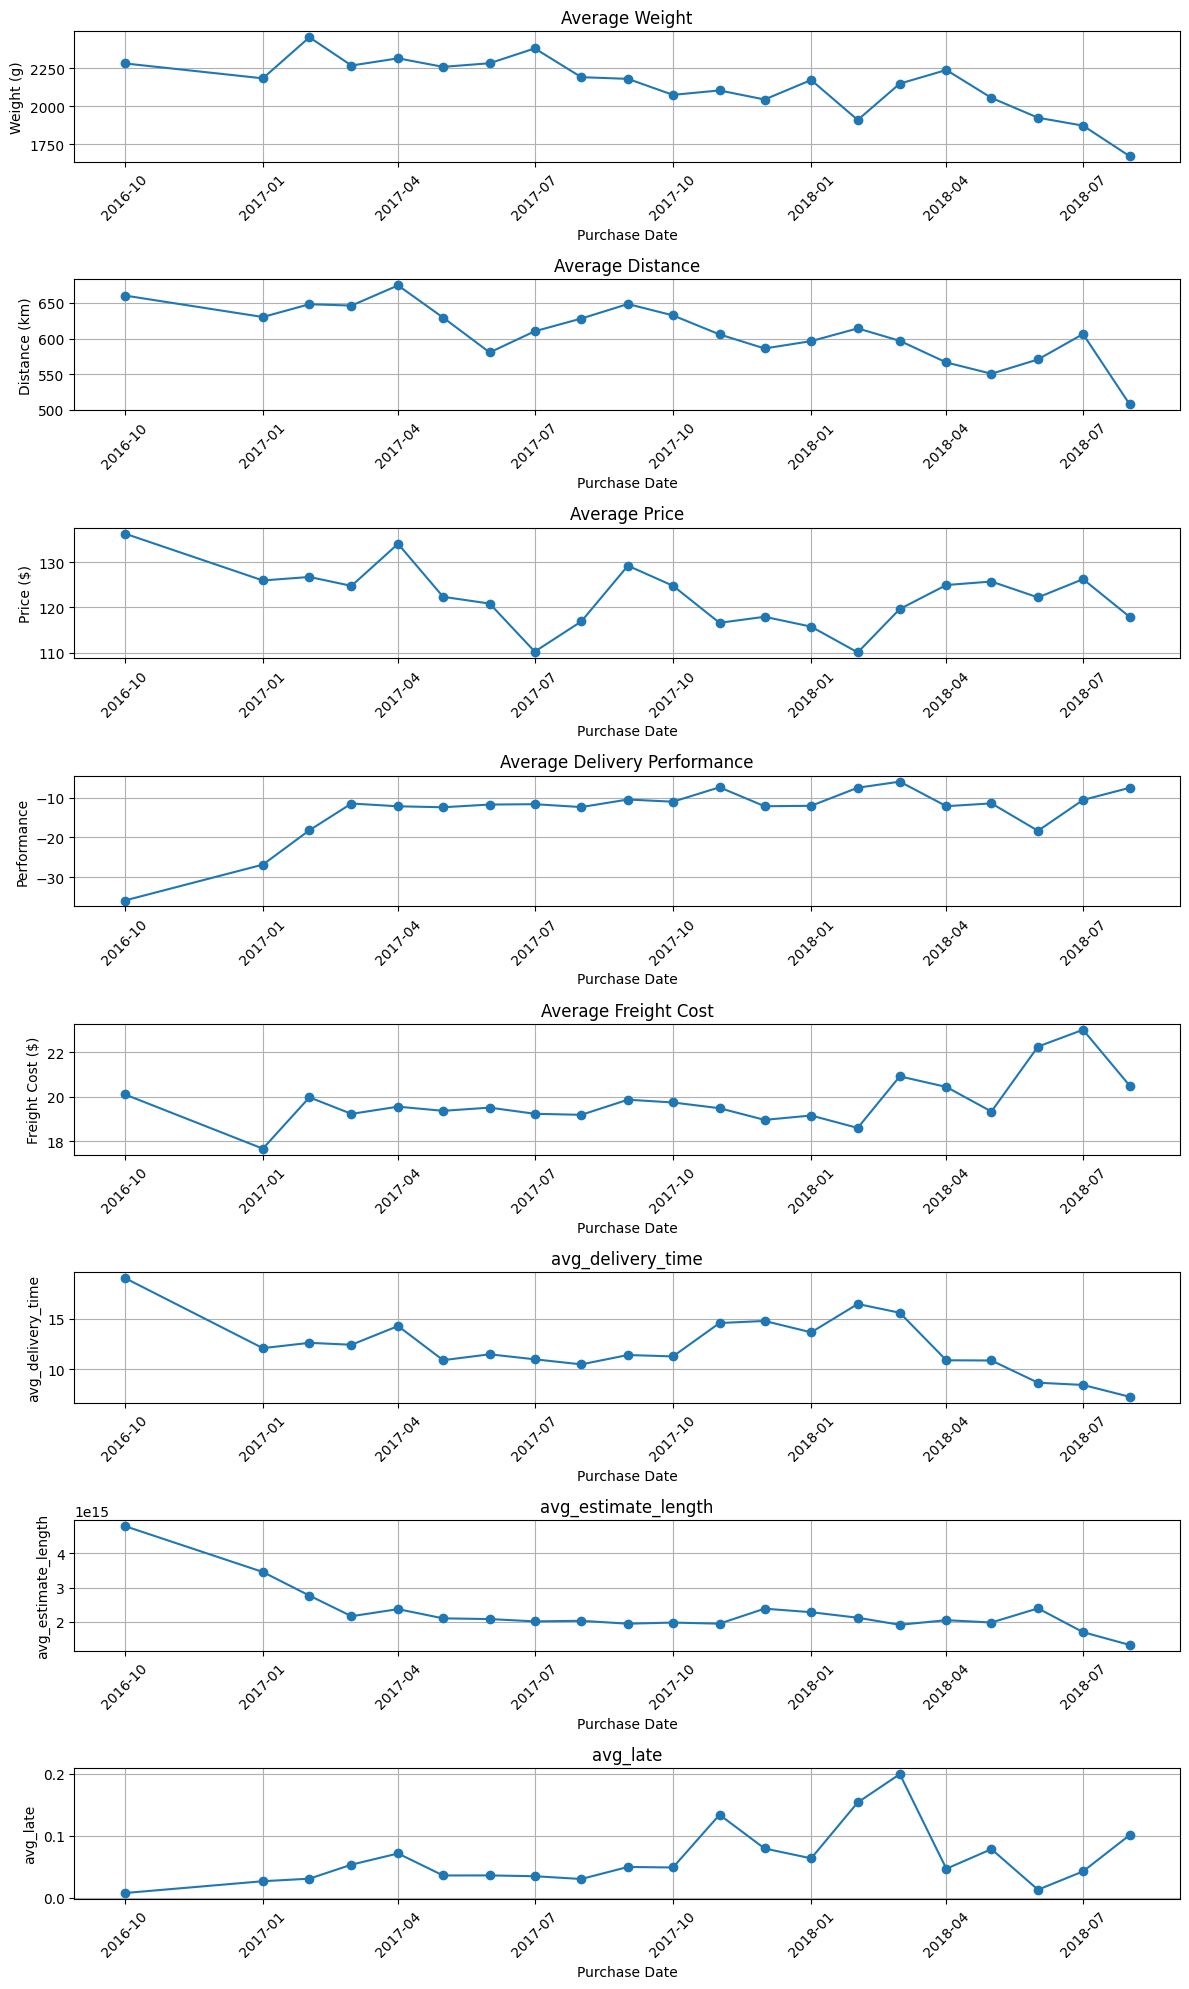

In [28]:
metrics = ['avg_weight', 'avg_distance', 'avg_price', 'avg_delivery_performance', 'avg_freight_cost', 'avg_delivery_time','avg_estimate_length', 'avg_late'] 
titles = ['Average Weight', 'Average Distance', 'Average Price', 'Average Delivery Performance', 'Average Freight Cost', 'avg_delivery_time','avg_estimate_length', 'avg_late']
y_labels = ['Weight (g)', 'Distance (km)', 'Price ($)', 'Performance', 'Freight Cost ($)', 'avg_delivery_time','avg_estimate_length', 'avg_late']

plt.figure(figsize=(12, 20))

for i, metric in enumerate(metrics):
    plt.subplot(len(metrics), 1, i + 1)
    plt.plot(monthly_averages['purchase_date'], monthly_averages[metric], label=titles[i], marker='o')
    plt.title(titles[i])
    plt.xlabel('Purchase Date')
    plt.ylabel(y_labels[i])
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


In [29]:
# Select the metrics for correlation
metrics_data = monthly_averages[['avg_weight', 'avg_distance', 'avg_price', 'avg_delivery_performance', 
                                 'avg_freight_cost', 'avg_delivery_time', 'avg_estimate_length', 'avg_late']]

# Compute the correlation matrix
correlation_matrix = metrics_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                          avg_weight  avg_distance  avg_price  \
avg_weight                  1.000000      0.636807   0.273406   
avg_distance                0.636807      1.000000   0.442746   
avg_price                   0.273406      0.442746   1.000000   
avg_delivery_performance   -0.319221     -0.368899  -0.556702   
avg_freight_cost           -0.373898     -0.253848   0.220160   
avg_delivery_time           0.354749      0.486816   0.113592   
avg_estimate_length         0.402080      0.485822   0.511443   
avg_late                   -0.352096     -0.257307  -0.421474   

                          avg_delivery_performance  avg_freight_cost  \
avg_weight                               -0.319221         -0.373898   
avg_distance                             -0.368899         -0.253848   
avg_price                                -0.556702          0.220160   
avg_delivery_performance                  1.000000          0.095927   
avg_freight_cost                          0.095927    

In [32]:
percentages_by_delays = pd.read_csv('../data_csv/scores_by_time_days_late.csv')

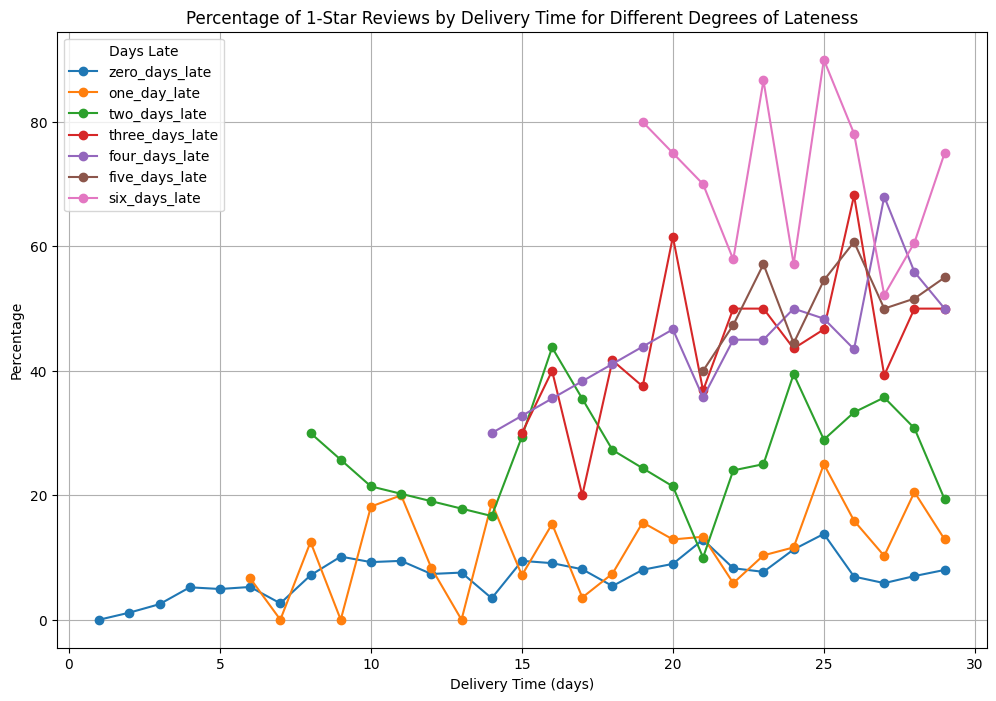

In [36]:
# Set the delivery_time column as the x-axis
x_axis = percentages_by_delays['delivery_time']

# Plot each percentage column as a line
plt.figure(figsize=(12, 8))
for column in ["zero_days_late", "one_day_late", "two_days_late", "three_days_late", "four_days_late", "five_days_late", "six_days_late"]:
    plt.plot(x_axis, percentages_by_delays[column].interpolate(), label=column, marker='o')  # Interpolate missing points to connect dots

# Add labels, title, and legend
plt.title('Percentage of 1-Star Reviews by Delivery Time for Different Degrees of Lateness')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Percentage')
plt.legend(title='Days Late')
plt.grid(True)
plt.show()

In [ ]:
freight_class = pd.read_csv('../data_csv/freight_class.csv')
import seaborn as sns

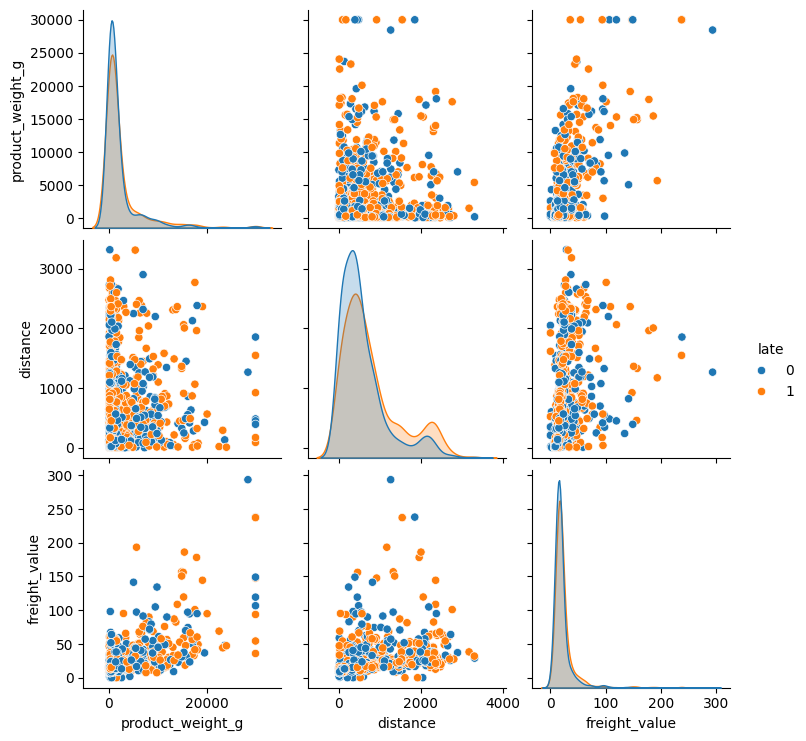

In [67]:
df_majority = freight_class[freight_class.late == 0]
df_minority = freight_class[freight_class.late == 1]
df_majority_undersampled = df_majority.sample(n=len(df_minority), replace=False, random_state=42)
df_undersampled = pd.concat([df_majority_undersampled, df_minority])
df_shuffled = df_undersampled.sample(frac=0.1).reset_index(drop=True)
sns.pairplot(df_shuffled, hue='late', diag_kind='kde', vars=['product_weight_g', 'distance', 'freight_value'])
plt.show()

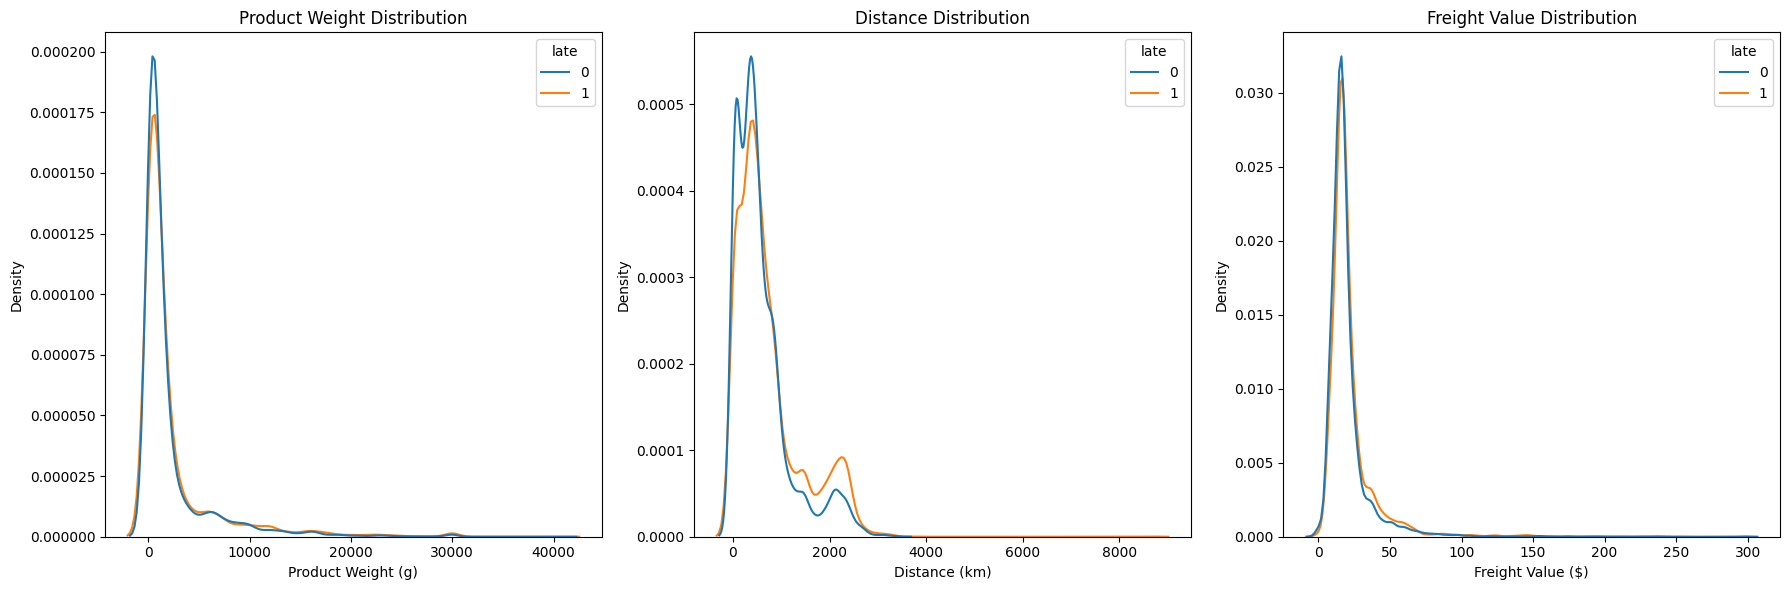

In [66]:
plt.figure(figsize=(18, 6))

# Plot for product_weight_g
plt.subplot(1, 3, 1)
sns.kdeplot(x='product_weight_g', hue='late', data=df_undersampled)
plt.title('Product Weight Distribution')
plt.xlabel('Product Weight (g)')
plt.ylabel('Density')

# Plot for distance
plt.subplot(1, 3, 2)
sns.kdeplot(x='distance', hue='late', data=df_undersampled)
plt.title('Distance Distribution')
plt.xlabel('Distance (km)')
plt.ylabel('Density')

# Plot for freight_value
plt.subplot(1, 3, 3)
sns.kdeplot(x='freight_value', hue='late', data=df_undersampled)
plt.title('Freight Value Distribution')
plt.xlabel('Freight Value ($)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/olist/lib/python3.13/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/olist/lib/python3.13/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/olist/lib/python3.13/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/olist/lib/python3.13/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/olist/lib/python3.13/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/olist/lib/python3.13/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/env

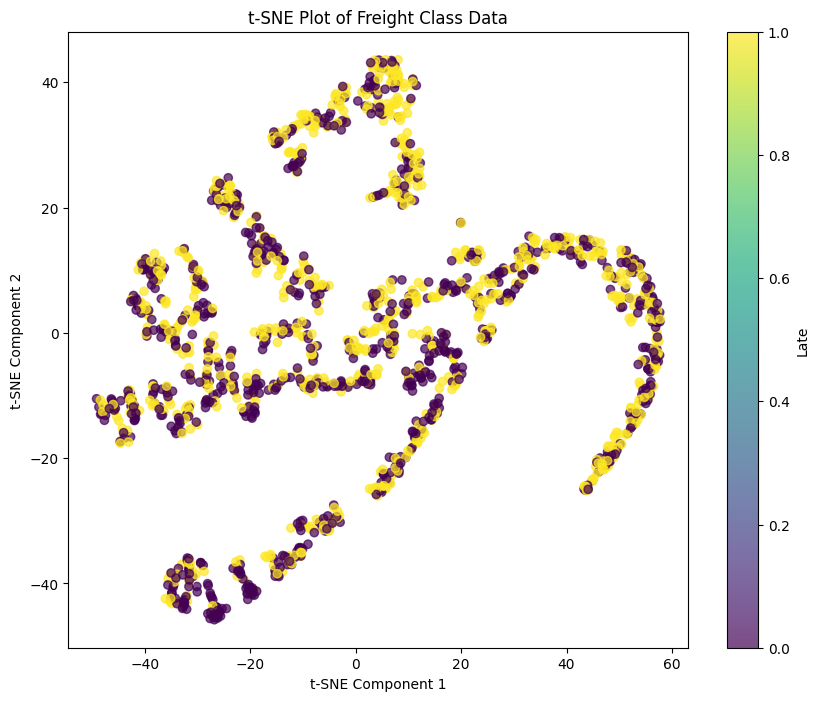

In [71]:

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

# Select relevant columns for t-SNE
features = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'distance', 'freight_value']
freight_class_cleaned = df_shuffled.dropna(subset=features)

# Extract features and target
X = freight_class_cleaned[features]
y = freight_class_cleaned['late']

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Late')
plt.title('t-SNE Plot of Freight Class Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

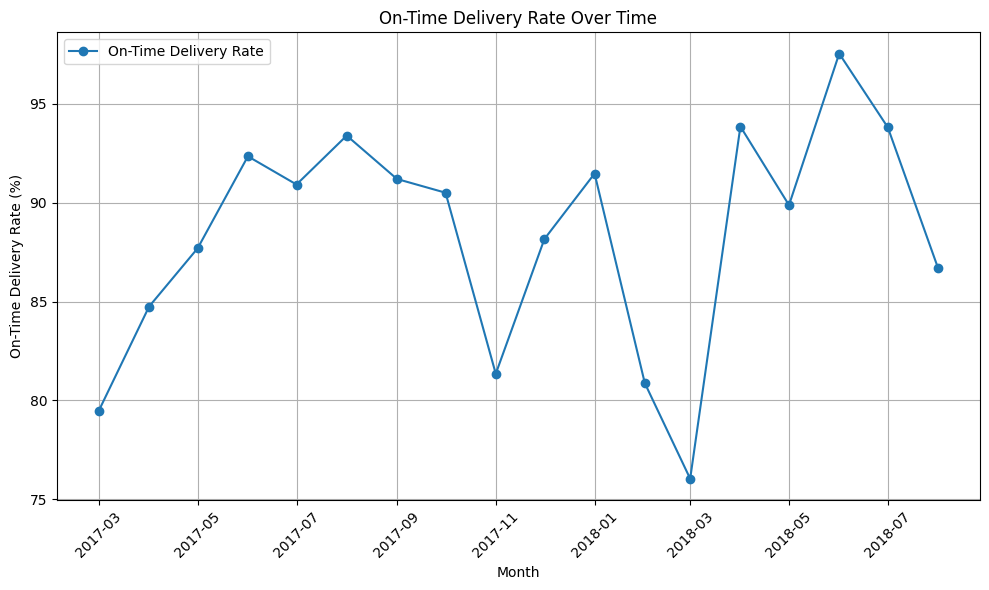

In [79]:
import pandas as pd

json_1 = [
    {
      "month": "2016-10-01 00:00:00",
      "on_time_delivery_rate": "85.1063829787234043",
      "number_late": "120",
      "number_sales": "141"
    },
    {
      "month": "2017-01-01 00:00:00",
      "on_time_delivery_rate": "89.4039735099337748",
      "number_late": "135",
      "number_sales": "151"
    },
    {
      "month": "2017-02-01 00:00:00",
      "on_time_delivery_rate": "87.2807017543859649",
      "number_late": "199",
      "number_sales": "228"
    },
    {
      "month": "2017-03-01 00:00:00",
      "on_time_delivery_rate": "89.0173410404624277",
      "number_late": "154",
      "number_sales": "173"
    },
    {
      "month": "2017-04-01 00:00:00",
      "on_time_delivery_rate": "85.3448275862068966",
      "number_late": "99",
      "number_sales": "116"
    },
    {
      "month": "2017-05-01 00:00:00",
      "on_time_delivery_rate": "82.2580645161290323",
      "number_late": "102",
      "number_sales": "124"
    },
    {
      "month": "2017-06-01 00:00:00",
      "on_time_delivery_rate": "86.8421052631578947",
      "number_late": "66",
      "number_sales": "76"
    },
    {
      "month": "2017-07-01 00:00:00",
      "on_time_delivery_rate": "94.7826086956521739",
      "number_late": "109",
      "number_sales": "115"
    },
    {
      "month": "2017-08-01 00:00:00",
      "on_time_delivery_rate": "88.3720930232558140",
      "number_late": "114",
      "number_sales": "129"
    },
    {
      "month": "2017-09-01 00:00:00",
      "on_time_delivery_rate": "86.6141732283464567",
      "number_late": "110",
      "number_sales": "127"
    },
    {
      "month": "2017-10-01 00:00:00",
      "on_time_delivery_rate": "90.4761904761904762",
      "number_late": "133",
      "number_sales": "147"
    },
    {
      "month": "2017-11-01 00:00:00",
      "on_time_delivery_rate": "81.0526315789473684",
      "number_late": "154",
      "number_sales": "190"
    },
    {
      "month": "2017-12-01 00:00:00",
      "on_time_delivery_rate": "85.5555555555555556",
      "number_late": "77",
      "number_sales": "90"
    },
    {
      "month": "2018-01-01 00:00:00",
      "on_time_delivery_rate": "88.6524822695035461",
      "number_late": "125",
      "number_sales": "141"
    },
    {
      "month": "2018-02-01 00:00:00",
      "on_time_delivery_rate": "80.8333333333333333",
      "number_late": "97",
      "number_sales": "120"
    },
    {
      "month": "2018-03-01 00:00:00",
      "on_time_delivery_rate": "73.4513274336283186",
      "number_late": "83",
      "number_sales": "113"
    },
    {
      "month": "2018-04-01 00:00:00",
      "on_time_delivery_rate": "88.6138613861386139",
      "number_late": "179",
      "number_sales": "202"
    },
    {
      "month": "2018-05-01 00:00:00",
      "on_time_delivery_rate": "88.3720930232558140",
      "number_late": "152",
      "number_sales": "172"
    },
    {
      "month": "2018-06-01 00:00:00",
      "on_time_delivery_rate": "97.3821989528795812",
      "number_late": "186",
      "number_sales": "191"
    },
    {
      "month": "2018-07-01 00:00:00",
      "on_time_delivery_rate": "88.9473684210526316",
      "number_late": "169",
      "number_sales": "190"
    },
    {
      "month": "2018-08-01 00:00:00",
      "on_time_delivery_rate": "87.0967741935483871",
      "number_late": "135",
      "number_sales": "155"
    }
  ]
import matplotlib.pyplot as plt

# Convert JSON to DataFrame
df = pd.DataFrame(json)

# Convert 'month' to datetime and 'on_time_delivery_rate' to float
df['month'] = pd.to_datetime(df['month'])
df['on_time_delivery_rate'] = df['on_time_delivery_rate'].astype(float)

# Plot the first two columns
plt.figure(figsize=(10, 6))
plt.plot(df['month'], df['on_time_delivery_rate'], marker='o', label='On-Time Delivery Rate')
plt.xlabel('Month')
plt.ylabel('On-Time Delivery Rate (%)')
plt.title('On-Time Delivery Rate Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

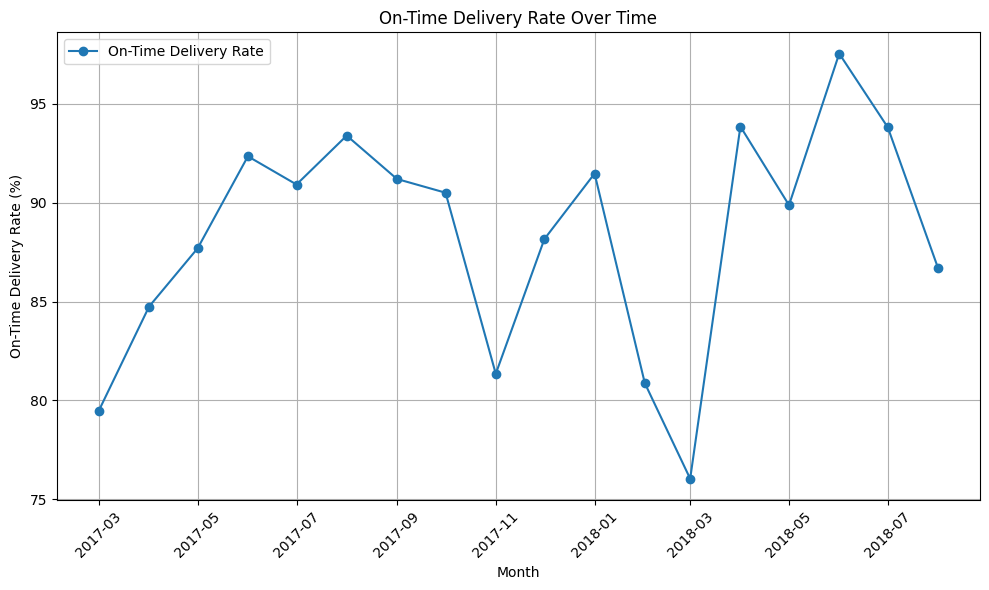

In [80]:
json_2 = [
  {
    "month": "2017-03-01 00:00:00",
    "on_time_delivery_rate": "79.4871794871794872",
    "number_late": "93",
    "number_sales": "117"
  },
  {
    "month": "2017-04-01 00:00:00",
    "on_time_delivery_rate": "84.7457627118644068",
    "number_late": "200",
    "number_sales": "236"
  },
  {
    "month": "2017-05-01 00:00:00",
    "on_time_delivery_rate": "87.6944837340876945",
    "number_late": "620",
    "number_sales": "707"
  },
  {
    "month": "2017-06-01 00:00:00",
    "on_time_delivery_rate": "92.3408845738942826",
    "number_late": "856",
    "number_sales": "927"
  },
  {
    "month": "2017-07-01 00:00:00",
    "on_time_delivery_rate": "90.9159159159159159",
    "number_late": "1211",
    "number_sales": "1332"
  },
  {
    "month": "2017-08-01 00:00:00",
    "on_time_delivery_rate": "93.3873144399460189",
    "number_late": "1384",
    "number_sales": "1482"
  },
  {
    "month": "2017-09-01 00:00:00",
    "on_time_delivery_rate": "91.1949685534591195",
    "number_late": "1450",
    "number_sales": "1590"
  },
  {
    "month": "2017-10-01 00:00:00",
    "on_time_delivery_rate": "90.5007743933918431",
    "number_late": "1753",
    "number_sales": "1937"
  },
  {
    "month": "2017-11-01 00:00:00",
    "on_time_delivery_rate": "81.3473053892215569",
    "number_late": "2717",
    "number_sales": "3340"
  },
  {
    "month": "2017-12-01 00:00:00",
    "on_time_delivery_rate": "88.1568926123381569",
    "number_late": "2315",
    "number_sales": "2626"
  },
  {
    "month": "2018-01-01 00:00:00",
    "on_time_delivery_rate": "91.4704192992533027",
    "number_late": "3185",
    "number_sales": "3482"
  },
  {
    "month": "2018-02-01 00:00:00",
    "on_time_delivery_rate": "80.8754208754208754",
    "number_late": "2402",
    "number_sales": "2970"
  },
  {
    "month": "2018-03-01 00:00:00",
    "on_time_delivery_rate": "76.0436562073669850",
    "number_late": "2787",
    "number_sales": "3665"
  },
  {
    "month": "2018-04-01 00:00:00",
    "on_time_delivery_rate": "93.8475665748393021",
    "number_late": "3066",
    "number_sales": "3267"
  },
  {
    "month": "2018-05-01 00:00:00",
    "on_time_delivery_rate": "89.8741945382019024",
    "number_late": "2929",
    "number_sales": "3259"
  },
  {
    "month": "2018-06-01 00:00:00",
    "on_time_delivery_rate": "97.5334018499486125",
    "number_late": "2847",
    "number_sales": "2919"
  },
  {
    "month": "2018-07-01 00:00:00",
    "on_time_delivery_rate": "93.8032005447735785",
    "number_late": "2755",
    "number_sales": "2937"
  },
  {
    "month": "2018-08-01 00:00:00",
    "on_time_delivery_rate": "86.6926898509581263",
    "number_late": "2443",
    "number_sales": "2818"
  }
]
# Convert JSON to DataFrame
df = pd.DataFrame(json)

# Convert 'month' to datetime and 'on_time_delivery_rate' to float
df['month'] = pd.to_datetime(df['month'])
df['on_time_delivery_rate'] = df['on_time_delivery_rate'].astype(float)

# Plot the first two columns
plt.figure(figsize=(10, 6))
plt.plot(df['month'], df['on_time_delivery_rate'], marker='o', label='On-Time Delivery Rate')
plt.xlabel('Month')
plt.ylabel('On-Time Delivery Rate (%)')
plt.title('On-Time Delivery Rate Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

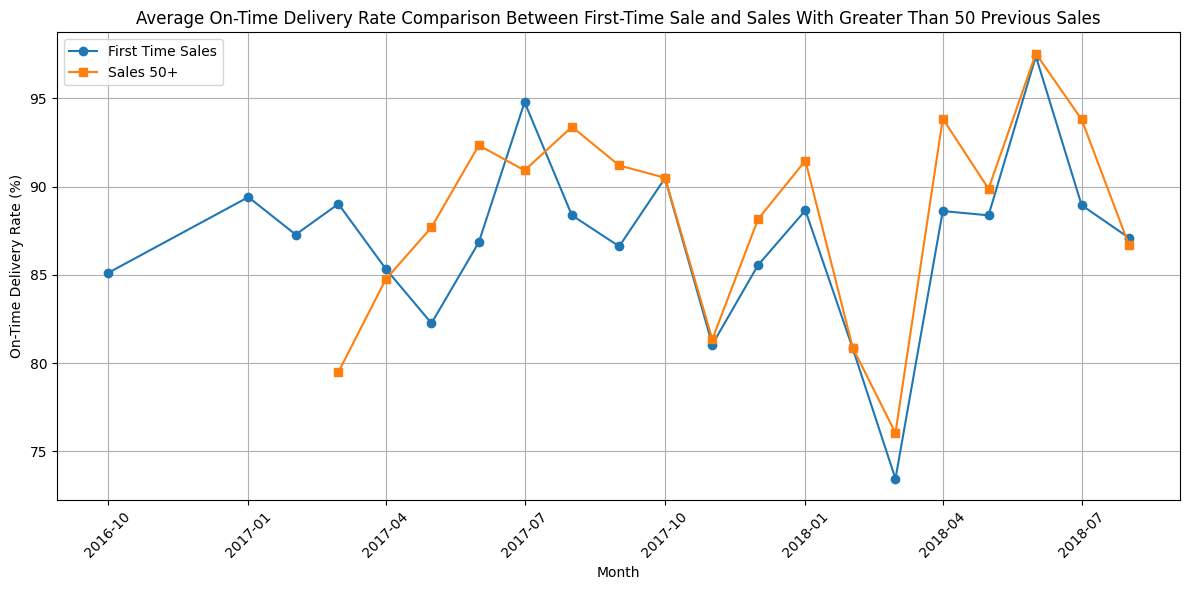

In [83]:

# Convert JSON data to DataFrames
df_json_1 = pd.DataFrame(json_1)
df_json_2 = pd.DataFrame(json_2)

# Convert 'month' to datetime and 'on_time_delivery_rate' to float
df_json_1['month'] = pd.to_datetime(df_json_1['month'])
df_json_1['on_time_delivery_rate'] = df_json_1['on_time_delivery_rate'].astype(float)

df_json_2['month'] = pd.to_datetime(df_json_2['month'])
df_json_2['on_time_delivery_rate'] = df_json_2['on_time_delivery_rate'].astype(float)

# Plot both datasets
plt.figure(figsize=(12, 6))
plt.plot(df_json_1['month'], df_json_1['on_time_delivery_rate'], marker='o', label='First Time Sales')
plt.plot(df_json_2['month'], df_json_2['on_time_delivery_rate'], marker='s', label='Sales 50+')

# Add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('On-Time Delivery Rate (%)')
plt.title('Average On-Time Delivery Rate Comparison Between First-Time Sale and Sales With Greater Than 50 Previous Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

                 average_late_percentage
days_to_carrier                         
0                               0.038847
1                               0.056534
2                               0.068616
3                               0.074566
4                               0.081776
5                               0.093645
6                               0.112866
7                               0.122990
8                               0.151822
9                               0.168561
10                              0.200236
11                              0.209380
12                              0.268537
13                              0.250000
14                              0.291971
15                              0.262948
16                              0.300847
17                              0.298969
18                              0.421348
19                              0.406504
20                              0.472727
21                              0.480392
22              

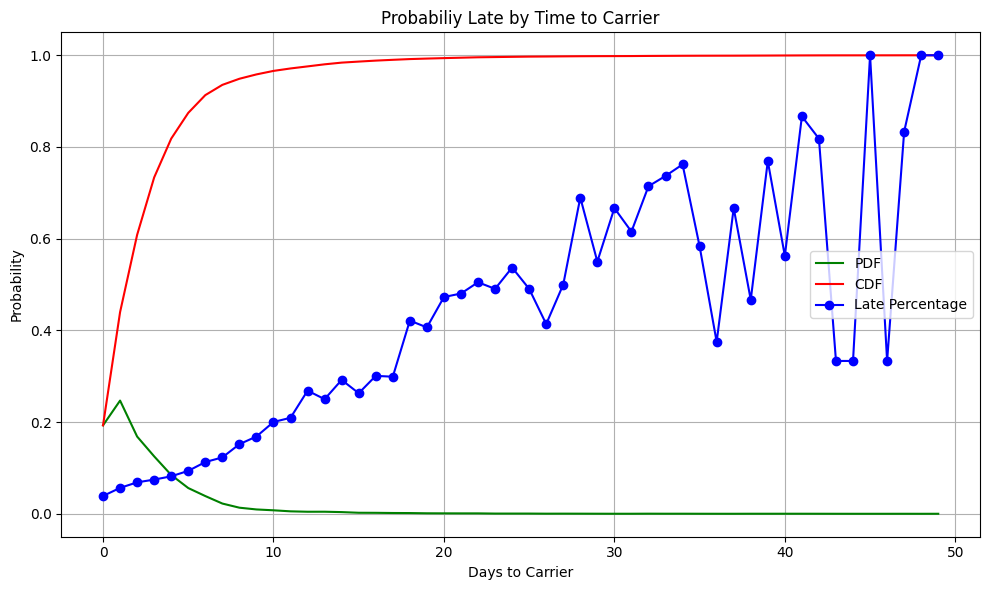

In [103]:
# Duplicate the same code for Carrier to Customer
df['days_to_carrier'] = (df['carrier_date'] - df['purchase_date']).dt.days
df = df[(df['days_to_carrier'] >= 0) & (df['days_to_carrier'] <= 50)]
pdf = df['days_to_carrier'].value_counts(normalize=True).sort_index()
cdf = pdf.cumsum()

grouped_df = df.groupby('days_to_carrier').agg(
    average_late_percentage=('late', 'mean')
)

plt.figure(figsize=(10, 6))
plt.plot(pdf.index, pdf.values, label='PDF', marker='', color='g')
plt.plot(cdf.index, cdf.values, label='CDF', marker='', color='r')
plt.plot(grouped_df.index, grouped_df['average_late_percentage'], label='Late Percentage', marker='o', color='b')

# Add labels, title, and legend
plt.title('Probabiliy Late by Time to Carrier')
plt.xlabel('Days to Carrier')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

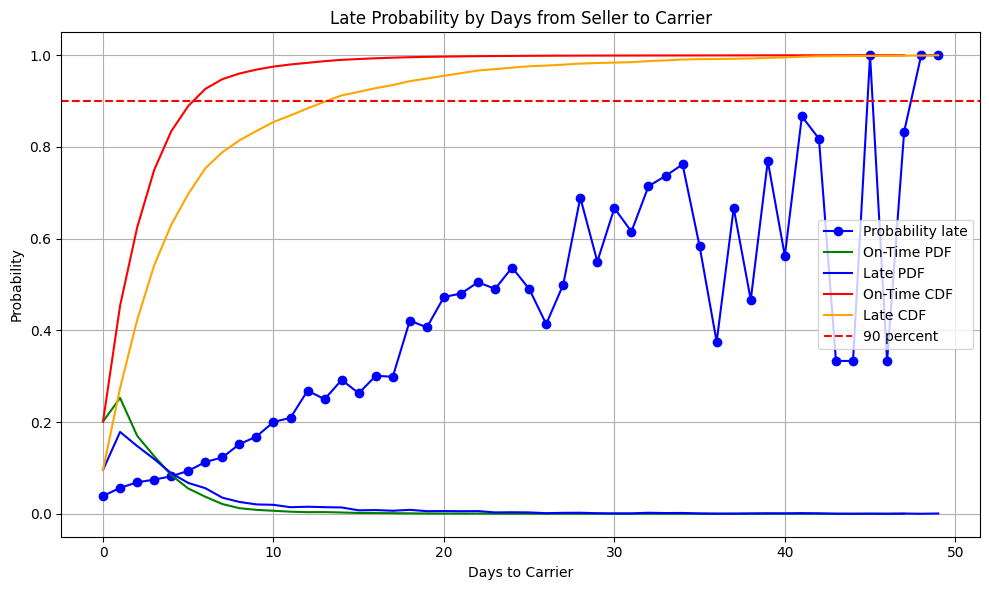

In [145]:
# Calculate PDF and CDF for days_to_carrier
df = pd.read_csv('../data_csv/delivery_solutions.csv')
df['carrier_date'] = pd.to_datetime(df['carrier_date'])
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['days_to_carrier'] = (df['carrier_date'] - df['purchase_date']).dt.days
df = df[(df['days_to_carrier'] >= 0) & (df['days_to_carrier'] <= 51)]
on_time_df = df[df['late']==0]
late_df = df[df['late']==1]
on_time_pdf = on_time_df['days_to_carrier'].value_counts(normalize=True).sort_index()
on_time_cdf = on_time_pdf.cumsum()
late_pdf = late_df['days_to_carrier'].value_counts(normalize=True).sort_index()
late_cdf = late_pdf.cumsum()
grouped_df = df.groupby('days_to_carrier').agg(
    average_late_percentage=('late', 'mean')
)

# Plot PDF and CDF
plt.figure(figsize=(10, 6))
plt.plot(grouped_df.index, grouped_df['average_late_percentage'], label='Probability late', marker='o', color='b')
plt.plot(on_time_pdf.index, on_time_pdf.values, label='On-Time PDF', marker='', color='g')
plt.plot(late_pdf.index, late_pdf.values, label='Late PDF', marker='', color='b')
plt.plot(on_time_cdf.index, on_time_cdf.values, label='On-Time CDF', marker='', color='r')
plt.plot(late_cdf.index, late_cdf.values, label='Late CDF', marker='', color='orange')
plt.axhline(y=0.9, color='r', linestyle='--', linewidth=1.5, label='90 percent')



# Add labels, title, and legend
plt.title('Late Probability by Days from Seller to Carrier')
plt.xlabel('Days to Carrier')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [169]:
# The increase in late deliveries observed as the time to carrier increases
# to some degree i
# for each time to carrier, multiply the percentage late increase from 1 day by number of orders in that segment.
df = pd.read_csv('../data_csv/delivery_solutions.csv')
df['carrier_date'] = pd.to_datetime(df['carrier_date'])
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['days_to_carrier'] = (df['carrier_date'] - df['purchase_date']).dt.days
grouped = df.groupby('days_to_carrier').agg(
    probability_late=('late', 'mean'),
    count=('late', 'size')
).reset_index()
grouped = grouped[grouped['days_to_carrier']>=4]

grouped['increase_in_late'] = (grouped['probability_late'] -0.080) * grouped['count']
total_increase_in_late = grouped['increase_in_late'].sum()
print(f"Total Increase in Late: {total_increase_in_late}")
late_count = df['late'].sum()
print(f"Count of Late Deliveries: {late_count}")
grouped.head(20)



Total Increase in Late: 1626.6
Count of Late Deliveries: 8715


,days_to_carrier,probability_late,count,increase_in_late
7,4.0,0.081776,9416,16.72
8,5.0,0.093645,6247,85.24
9,6.0,0.112866,4306,141.52
10,7.0,0.122990,2488,106.96
11,8.0,0.151822,1482,106.44
12,9.0,0.168561,1056,93.52
13,10.0,0.200236,849,102.08
14,11.0,0.209380,597,77.24
15,12.0,0.268537,499,94.08
16,13.0,0.250000,504,85.68


In [ ]:
# monthlies for seller late rate - set arbitrary threshold for poor delivery performance, superimpose on delivery rate

In [154]:
df = pd.read_csv('../data_csv/delivery_solutions.csv')
df['carrier_date'] = pd.to_datetime(df['carrier_date'])
df['customer_date'] = pd.to_datetime(df['customer_date'])
df['carrier_to_customer'] = (df['customer_date'] - df['carrier_date']).dt.days
late_count = df['late'].sum()
print(f"Count of Late Deliveries: {late_count}")

df = df[df['carrier_to_customer']>=12]
grouped = df.groupby('carrier_to_customer').agg(
    probability_late=('late', 'mean'),
    count=('late', 'size')
).reset_index()

grouped['increase_in_late'] = (grouped['probability_late'] -0.030629) * grouped['count']
total_increase_in_late = grouped['increase_in_late'].sum()
print(f"Total Increase in Late: {total_increase_in_late}")
grouped.head(50)


Count of Late Deliveries: 8715
Total Increase in Late: 6179.179260000002


,carrier_to_customer,probability_late,count,increase_in_late
0,12.0,0.030629,3624,0.000504
1,13.0,0.051085,3641,74.479811
2,14.0,0.062321,3145,99.671795
3,15.0,0.096588,2081,137.261051
4,16.0,0.107438,1573,120.820583
5,17.0,0.137327,1369,146.068899
6,18.0,0.166804,1217,165.724507
7,19.0,0.212197,1197,217.337087
8,20.0,0.270229,1310,313.876010
9,21.0,0.324275,1104,324.185584


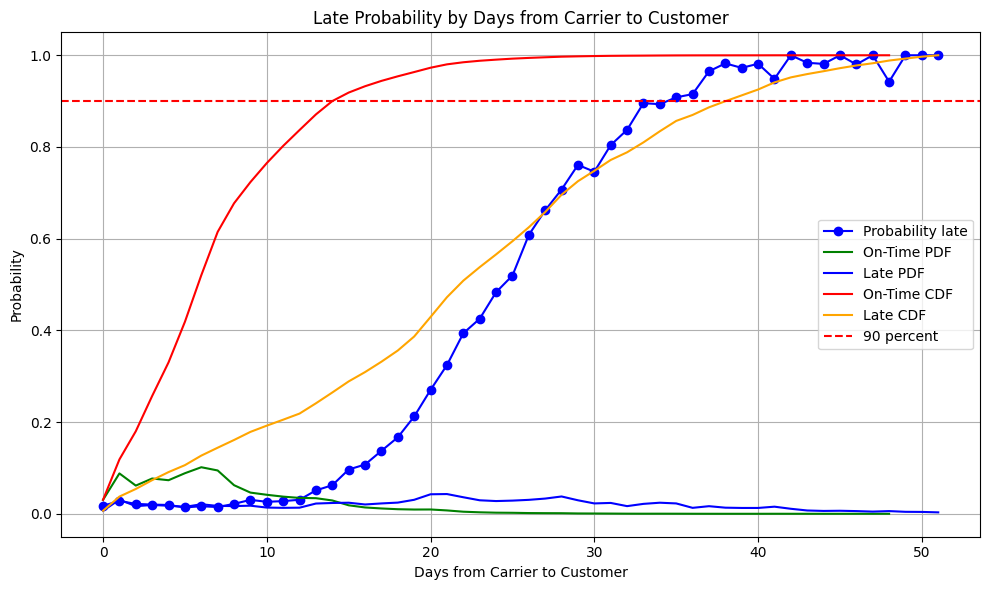

In [144]:


# Calculate PDF and CDF for days_to_carrier
df = pd.read_csv('../data_csv/delivery_solutions.csv')
df['carrier_date'] = pd.to_datetime(df['carrier_date'])
df['customer_date'] = pd.to_datetime(df['customer_date'])
df['carrier_to_customer'] = (df['customer_date'] - df['carrier_date']).dt.days


df = df[(df['carrier_to_customer'] >= 0) & (df['carrier_to_customer'] <= 51)]
on_time_df = df[df['late']==0]
late_df = df[df['late']==1]
on_time_pdf = on_time_df['carrier_to_customer'].value_counts(normalize=True).sort_index()
on_time_cdf = on_time_pdf.cumsum()
late_pdf = late_df['carrier_to_customer'].value_counts(normalize=True).sort_index()
late_cdf = late_pdf.cumsum()
grouped_df = df.groupby('carrier_to_customer').agg(
    probability_late=('late', 'mean')
).reset_index()

# Plot PDF and CDF
plt.figure(figsize=(10, 6))
plt.plot(grouped_df.index, grouped_df['probability_late'], label='Probability late', marker='o', color='b')
plt.plot(on_time_pdf.index, on_time_pdf.values, label='On-Time PDF', marker='', color='g')
plt.plot(late_pdf.index, late_pdf.values, label='Late PDF', marker='', color='b')
plt.plot(on_time_cdf.index, on_time_cdf.values, label='On-Time CDF', marker='', color='r')
plt.plot(late_cdf.index, late_cdf.values, label='Late CDF', marker='', color='orange')
plt.axhline(y=0.9, color='r', linestyle='--', linewidth=1.5, label='90 percent')



# Add labels, title, and legend
plt.title('Late Probability by Days from Carrier to Customer')
plt.xlabel('Days from Carrier to Customer')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [170]:
df = pd.read_csv('../data_csv/delivery_solutions.csv')
df['carrier_to_customer'] = (pd.to_datetime(df['customer_date']) - pd.to_datetime(df['carrier_date'])).dt.days
df['purchase_to_carrier'] = (pd.to_datetime(df['carrier_date']) - pd.to_datetime(df['purchase_date'])).dt.days
df = df[df['purchase_to_carrier']<20] #limiting to high counts
correlation = df['carrier_to_customer'].corr(df['purchase_to_carrier'])
print(f"Correlation between 'carrier_to_customer' and 'purchase_to_carrier': {correlation}")

Correlation between 'carrier_to_customer' and 'purchase_to_carrier': 0.02687991838668749


In [160]:
df = pd.read_csv('../data_csv/delivery_solutions.csv')
df['carrier_to_customer'] = (pd.to_datetime(df['customer_date']) - pd.to_datetime(df['carrier_date'])).dt.days
df['purchase_to_carrier'] = (pd.to_datetime(df['carrier_date']) - pd.to_datetime(df['purchase_date'])).dt.days
# Group by 'carrier_to_customer' and calculate the average 'purchase_to_carrier'
grouped_data = df.groupby('carrier_to_customer').agg(
    avg_purchase_to_carrier=('purchase_to_carrier', 'mean')
).reset_index()

grouped_data.head(50)

,carrier_to_customer,avg_purchase_to_carrier
0,-17.0,20.000000
1,-8.0,9.500000
2,-7.0,11.000000
3,-6.0,14.250000
4,-5.0,23.000000
5,-3.0,8.000000
6,-2.0,5.473684
7,-1.0,7.538462
8,0.0,3.070270
9,1.0,2.668589


In [162]:
df = pd.read_csv('../data_csv/delivery_solutions.csv')
df['carrier_to_customer'] = (pd.to_datetime(df['customer_date']) - pd.to_datetime(df['carrier_date'])).dt.days
df['purchase_to_carrier'] = (pd.to_datetime(df['carrier_date']) - pd.to_datetime(df['purchase_date'])).dt.days
# Group by 'carrier_to_customer' and calculate the average 'purchase_to_carrier'
grouped_data = df.groupby('purchase_to_carrier').agg(
    avg_purchase_to_carrier=('carrier_to_customer', 'mean')
).reset_index()

grouped_data.head(50)

,purchase_to_carrier,avg_purchase_to_carrier
0,-172.0,178.000000
1,-5.0,14.000000
2,-1.0,6.826087
3,0.0,7.867913
4,1.0,8.634998
5,2.0,9.008683
6,3.0,9.015174
7,4.0,9.160755
8,5.0,9.192738
9,6.0,8.935507


In [ ]:
otd_by_customer_state = pd.read_csv('../data_csv/otd_by_customer_state.csv')



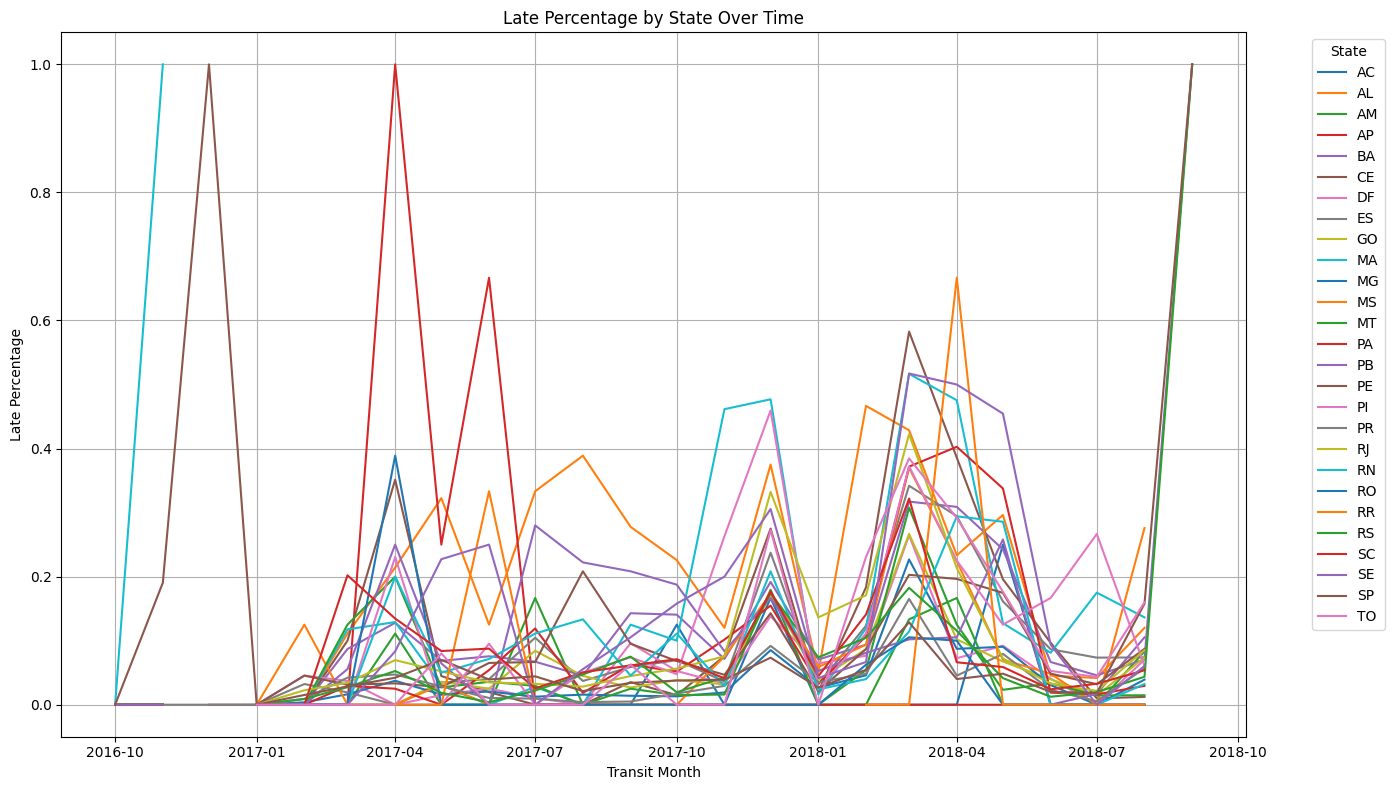

In [ ]:


# Convert transit_month to datetime
otd_by_customer_state['transit_month'] = pd.to_datetime(otd_by_customer_state['transit_month'])

# Group by customer_state and transit_month, and calculate the late percentage
late_percentage_by_state = otd_by_customer_state.groupby(['customer_state', 'transit_month']).agg(
    late_percentage=('late', 'mean')
).reset_index()

# Pivot the data to have states as columns
pivot_data = late_percentage_by_state.pivot(index='transit_month', columns='customer_state', values='late_percentage')

# Plot the late percentage for each state over time
plt.figure(figsize=(14, 8))
for state in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[state], label=state)

# Add labels, title, and legend
plt.title('Late Percentage by State Over Time')
plt.xlabel('Transit Month')
plt.ylabel('Late Percentage')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

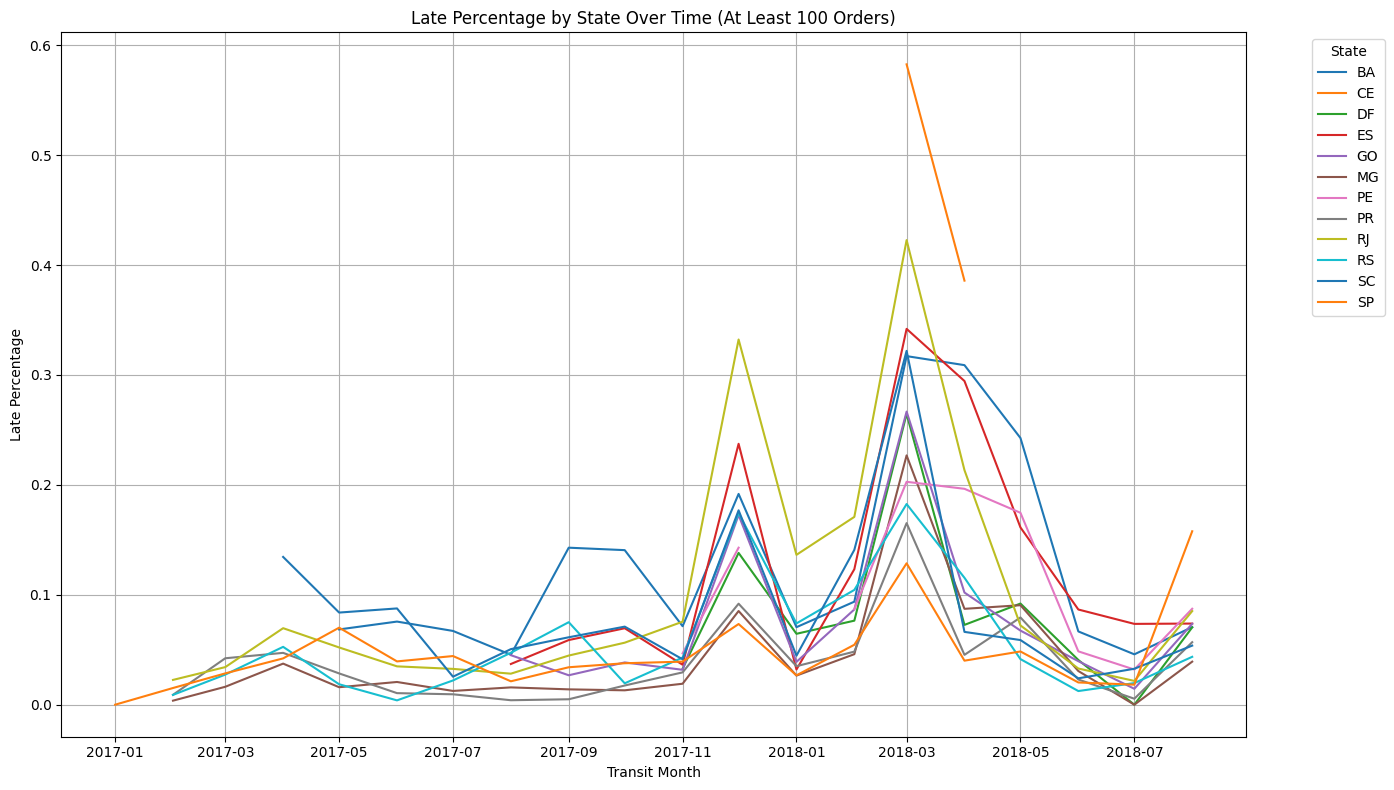

In [196]:
# Convert transit_month to datetime
otd_by_customer_state['transit_month'] = pd.to_datetime(otd_by_customer_state['transit_month'])

# Group by customer_state and transit_month, and calculate the late percentage and count
late_percentage_by_state = otd_by_customer_state.groupby(['customer_state', 'transit_month']).agg(
    late_percentage=('late', 'mean'),
    order_count=('late', 'size')
).reset_index()

# Filter data to include only points with at least 10 orders
filtered_data = late_percentage_by_state[late_percentage_by_state['order_count'] >= 100]

# Pivot the data to have states as columns
pivot_data = filtered_data.pivot(index='transit_month', columns='customer_state', values='late_percentage')

# Plot the late percentage for each state over time
plt.figure(figsize=(14, 8))
for state in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[state], label=state)

# Add labels, title, and legend
plt.title('Late Percentage by State Over Time (At Least 100 Orders)')
plt.xlabel('Transit Month')
plt.ylabel('Late Percentage')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [178]:
otd_SP_only = pd.read_csv('../data_csv/otd_SP_only.csv')


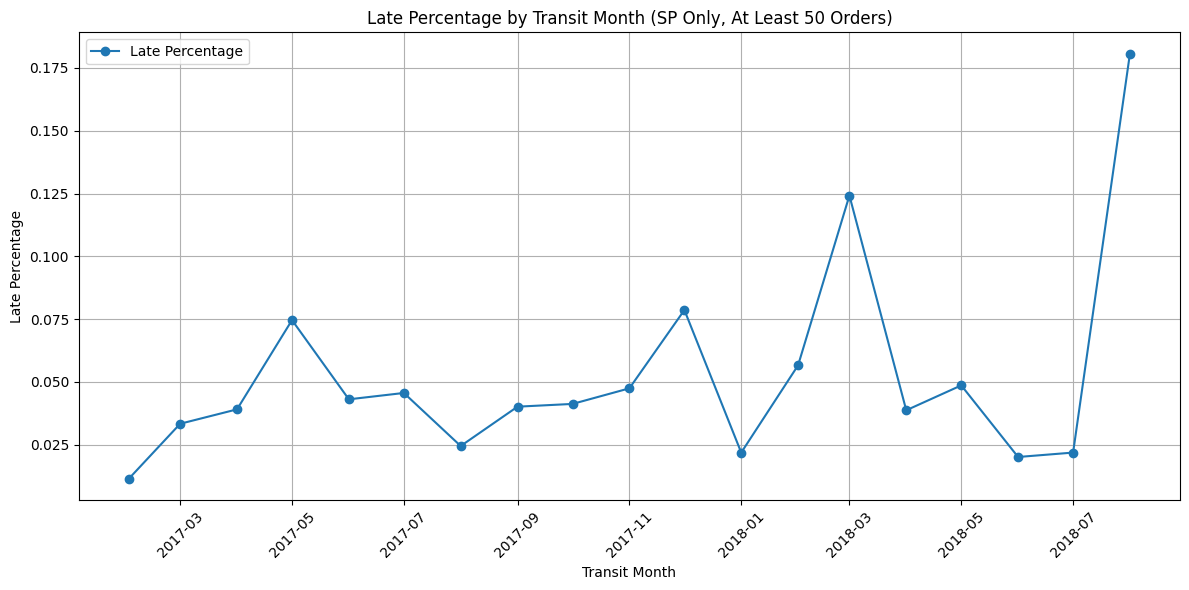

In [183]:
# Convert transit_month to datetime if not already
otd_SP_only['transit_month'] = pd.to_datetime(otd_SP_only['transit_month'])

# Group by transit_month and calculate the late percentage and order count
late_percentage_by_month = otd_SP_only.groupby('transit_month').agg(
    late_percentage=('late', 'mean'),
    order_count=('late', 'size')
).reset_index()

# Filter data to include only points with at least 50 orders
filtered_data = late_percentage_by_month[late_percentage_by_month['order_count'] >= 300]

# Plot the late percentage over time
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['transit_month'], filtered_data['late_percentage'], marker='o', label='Late Percentage')

# Add labels, title, and legend
plt.title('Late Percentage by Transit Month (SP Only, At Least 50 Orders)')
plt.xlabel('Transit Month')
plt.ylabel('Late Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

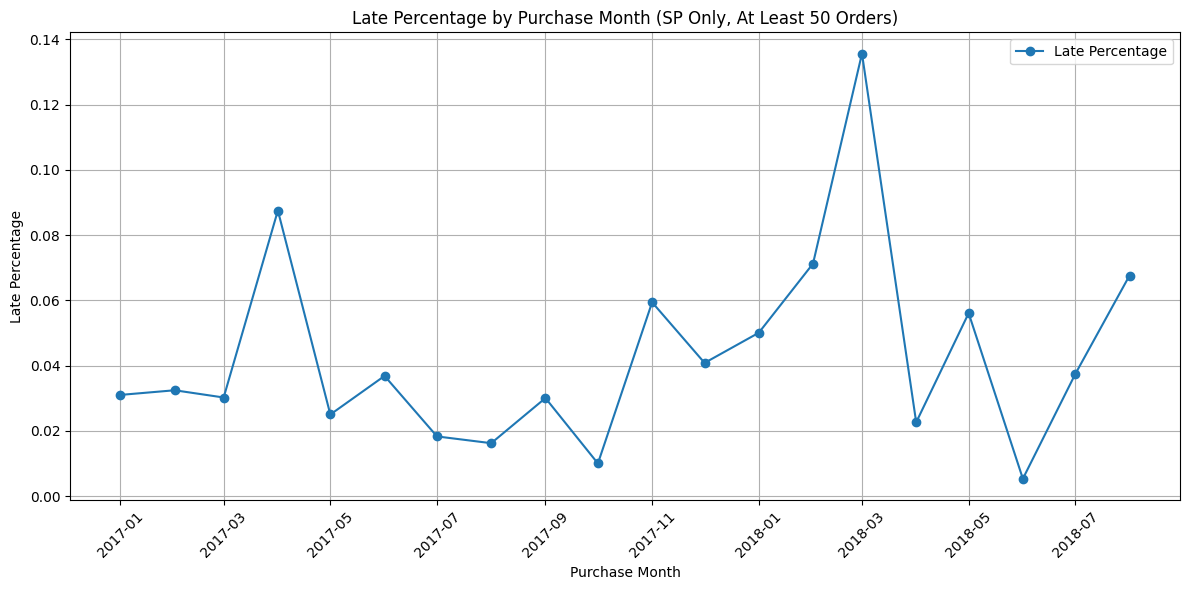

In [198]:
SP_only_purchase_month = pd.read_csv('../data_csv/otd_SP_customers.csv')
# Convert purchase_month to datetime
SP_only_purchase_month['purchase_month'] = pd.to_datetime(SP_only_purchase_month['purchase_month'])

# Group by purchase_month and calculate the late percentage and order count
late_percentage_by_month = SP_only_purchase_month.groupby('purchase_month').agg(
    late_percentage=('late', 'mean'),
    order_count=('late', 'size')
).reset_index()

# Filter data to include only points with at least 50 orders
filtered_data = late_percentage_by_month[late_percentage_by_month['order_count'] >= 50]

# Plot the late percentage over time
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['purchase_month'], filtered_data['late_percentage'], marker='o', label='Late Percentage')

# Add labels, title, and legend
plt.title('Late Percentage by Purchase Month (SP Only, At Least 50 Orders)')
plt.xlabel('Purchase Month')
plt.ylabel('Late Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


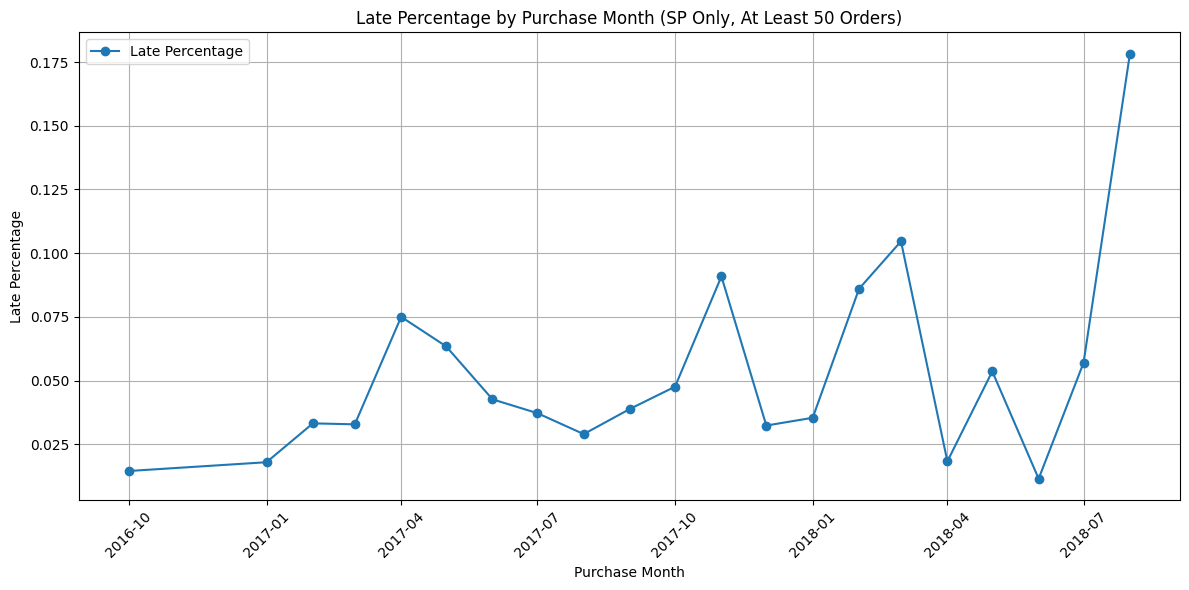

In [188]:
SP_only_purchase_month = pd.read_csv('../data_csv/SP_only_purchase_month.csv')
# Convert purchase_month to datetime
SP_only_purchase_month['purchase_month'] = pd.to_datetime(SP_only_purchase_month['purchase_month'])

# Group by purchase_month and calculate the late percentage and order count
late_percentage_by_month = SP_only_purchase_month.groupby('purchase_month').agg(
    late_percentage=('late', 'mean'),
    order_count=('late', 'size')
).reset_index()

# Filter data to include only points with at least 50 orders
filtered_data = late_percentage_by_month[late_percentage_by_month['order_count'] >= 50]

# Plot the late percentage over time
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['purchase_month'], filtered_data['late_percentage'], marker='o', label='Late Percentage')

# Add labels, title, and legend
plt.title('Late Percentage by Purchase Month (SP Only, At Least 50 Orders)')
plt.xlabel('Purchase Month')
plt.ylabel('Late Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [190]:
estimate_length = pd.read_csv('../data_csv/estimate_length.csv')

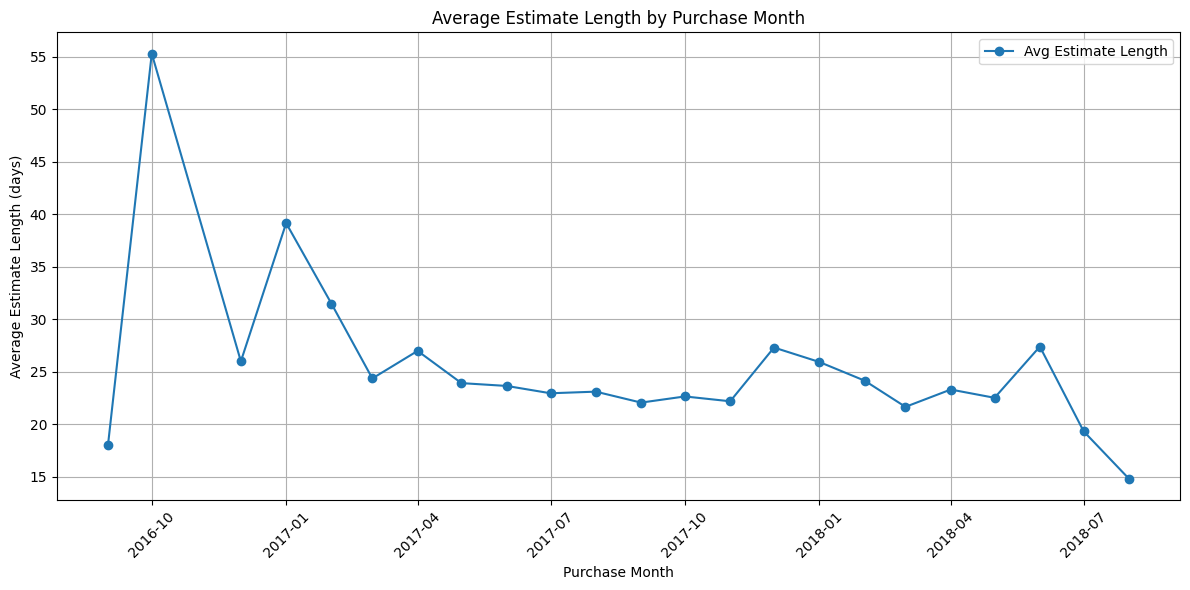

In [194]:
# Convert purchase_month to datetime if not already
estimate_length['purchase_month'] = pd.to_datetime(estimate_length['purchase_month'])

# Plot avg_estimate_length over purchase_month
plt.figure(figsize=(12, 6))
plt.plot(estimate_length['purchase_month'], estimate_length['avg_estimated_length'], marker='o', label='Avg Estimate Length')

# Add labels, title, and legend
plt.title('Average Estimate Length by Purchase Month')
plt.xlabel('Purchase Month')
plt.ylabel('Average Estimate Length (days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

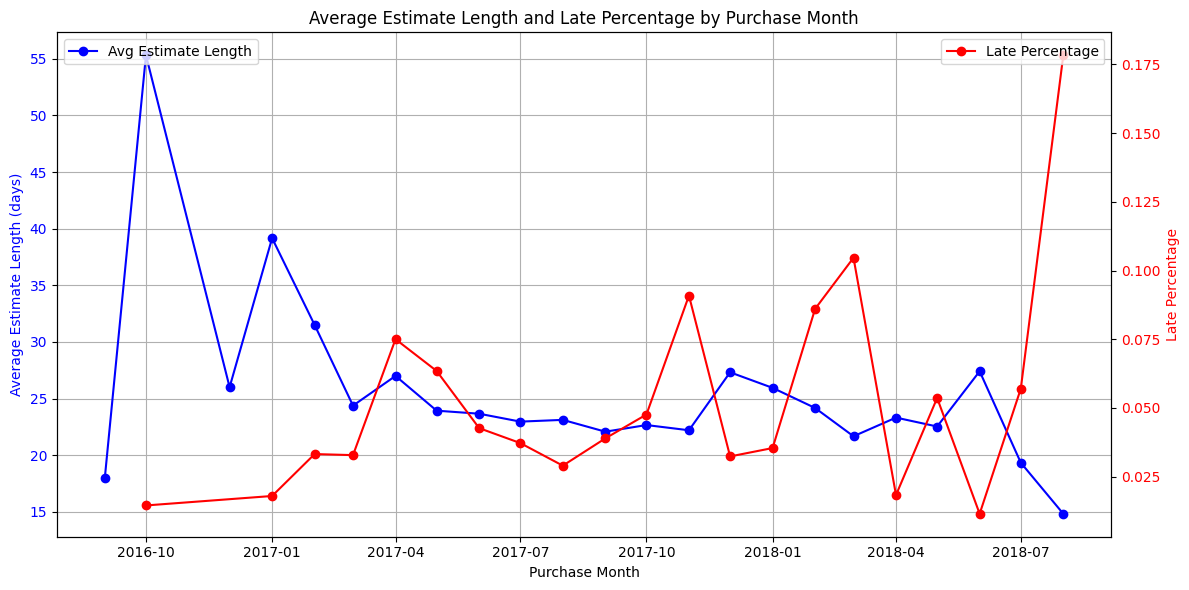

In [195]:
# Convert purchase_month to datetime if not already
estimate_length['purchase_month'] = pd.to_datetime(estimate_length['purchase_month'])

# Plot both metrics on the same figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot avg_estimate_length on the primary y-axis
ax1.plot(estimate_length['purchase_month'], estimate_length['avg_estimated_length'], marker='o', label='Avg Estimate Length', color='blue')
ax1.set_xlabel('Purchase Month')
ax1.set_ylabel('Average Estimate Length (days)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Average Estimate Length and Late Percentage by Purchase Month')

# Load SP_only_purchase_month data
SP_only_purchase_month = pd.read_csv('../data_csv/SP_only_purchase_month.csv')
SP_only_purchase_month['purchase_month'] = pd.to_datetime(SP_only_purchase_month['purchase_month'])

# Group by purchase_month and calculate the late percentage and order count
late_percentage_by_month = SP_only_purchase_month.groupby('purchase_month').agg(
    late_percentage=('late', 'mean'),
    order_count=('late', 'size')
).reset_index()

# Filter data to include only points with at least 50 orders
filtered_data = late_percentage_by_month[late_percentage_by_month['order_count'] >= 50]

# Plot late_percentage on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(filtered_data['purchase_month'], filtered_data['late_percentage'], marker='o', label='Late Percentage', color='red')
ax2.set_ylabel('Late Percentage', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add grid and legend
fig.tight_layout()
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

machine_learning = pd.read_csv('../data_csv/machine_learning.csv')

# Include the new features in the feature set
features = ['freight_value', 'product_weight_g', 'price', 'distance', 'route', 'estimate_length', 'category']
X = pd.get_dummies(machine_learning[features].dropna(), columns=['route', 'category'])
y = machine_learning.loc[X.index, 'late']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9295755109590308

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     19937
           1       0.71      0.17      0.27      1689

    accuracy                           0.93     21626
   macro avg       0.82      0.58      0.62     21626
weighted avg       0.92      0.93      0.91     21626



Key metrics -- I want to extend the deadline when it's very clear that it will be late.
So most important is precision 1. If I say it is positive, it should be.
Minimize - false negative
Maximize - true positive rate

recall is low - it only captures 17 percent of positive cases
it captures 99 percent of all negative cases.

When the model determines it is positive, it gets it right 71 percent of the time, meaning 
When the model determines it is negative, it gets it right 93 percent of the time, meaning about 7 percent of negatives are late.

In [245]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Load dataset
df = pd.read_csv('../data_csv/customer_neighbors.csv') 
df = df.dropna()

# Convert latitude and longitude to radians
coords = np.radians(df[['latitude', 'longitude']])

# Fit kNN model (k=5 is typical, adjust as needed)
k = 20
nbrs = NearestNeighbors(n_neighbors=k+1,  # +1 to include the point itself
                        algorithm='ball_tree',
                        metric='haversine').fit(coords)

# Compute distances
distances, indices = nbrs.kneighbors(coords)

# Skip the first column (distance to self = 0), convert from radians to kilometers
avg_distances = distances[:, 1:].mean(axis=1) * 6371  # Earth's radius in km

# Add to DataFrame
df['avg_neighbor_distance_km'] = avg_distances
df.head(20)
df = df[['customer_unique_id', 'avg_neighbor_distance_km']]
df.head(20)


,customer_unique_id,avg_neighbor_distance_km
0,861eff4711a542e4b93843c6dd7febb0,0.468284
1,290c77bc529b7ac935b93aa66c333dc3,0.090499
2,060e732b5b29e8181a18229c7b0b2b5e,0.124451
3,259dac757896d24d7702b9acbbff3f3c,0.811154
4,345ecd01c38d18a9036ed96c73b8d066,0.000000
5,4c93744516667ad3b8f1fb645a3116a4,1.229255
6,addec96d2e059c80c30fe6871d30d177,0.010349
7,57b2a98a409812fe9618067b6b8ebe4f,2.201507
8,1175e95fb47ddff9de6b2b06188f7e0d,0.250733
9,9afe194fb833f79e300e37e580171f22,0.000000


In [ ]:
# Maximal features, added everything I could
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

machine_learning = pd.read_csv('../data_csv/machine_learning_1.csv')
machine_learning = machine_learning.merge(
    df[['customer_unique_id', 'avg_neighbor_distance_km']],
    on='customer_unique_id',
    how='left'
)
# Create interaction feature: freight value divided by product weight
machine_learning['freight_per_weight'] = machine_learning.apply(
    lambda row: row['freight_value'] / row['total_order_weight'] if row['total_order_weight'] > 0 and pd.notnull(row['total_order_weight']) else np.nan,
    axis=1
)
# Fix right-skewed features using log transformation
skewed_features = ['price', 'distance', 'total_order_weight', 'freight_per_weight', 'freight_value', 'avg_neighbor_distance_km']
for feature in skewed_features:
    machine_learning[feature] = machine_learning[feature].apply(lambda x: np.log1p(x) if x > 0 else 0)

# Include the new features in the feature set
features = ['unique_seller_count', 'delivery_time_buffer', 'product_count', 'seller_state', 'customer_state', 'route', 'estimate_length', 'freight_value', 'total_order_weight', 'price', 'distance', 'category', 'same_state', 'same_city', 'avg_neighbor_distance_km', 'freight_per_weight']
X = pd.get_dummies(machine_learning[features].dropna(), columns=['seller_state', 'customer_state', 'route', 'category'])
y = machine_learning.loc[X.index, 'late']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9358892710058166

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     21673
           1       0.92      0.22      0.35      1880

    accuracy                           0.94     23553
   macro avg       0.93      0.61      0.66     23553
weighted avg       0.93      0.94      0.92     23553



In [ ]:
# current best model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

machine_learning = pd.read_csv('../data_csv/machine_learning_1.csv')
machine_learning = machine_learning.merge(
    df[['customer_unique_id', 'avg_neighbor_distance_km']],
    on='customer_unique_id',
    how='left'
)
# Create interaction feature: freight value divided by product weight
machine_learning['freight_per_weight'] = machine_learning.apply(
    lambda row: row['freight_value'] / row['total_order_weight'] if row['total_order_weight'] > 0 and pd.notnull(row['total_order_weight']) else np.nan,
    axis=1
)

# Include the new features in the feature set
features = ['unique_seller_count', 'delivery_time_buffer', 'product_count',  'estimate_length', 'freight_value', 'freight_per_weight', 'price', 'distance', 'category', 'same_state',  'avg_neighbor_distance_km']
X = pd.get_dummies(machine_learning[features].dropna(), columns=[ 'category'])
y = machine_learning.loc[X.index, 'late']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

y_pred_proba = clf.predict_proba(X_test)[:, 1]



# Note, adding the customer and seller states may add too many features and lowers model performance
# perhaps, we can change the customer state to regional columns.

Accuracy: 0.9380093007380861

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     21601
           1       0.96      0.22      0.36      1838

    accuracy                           0.94     23439
   macro avg       0.95      0.61      0.66     23439
weighted avg       0.94      0.94      0.92     23439



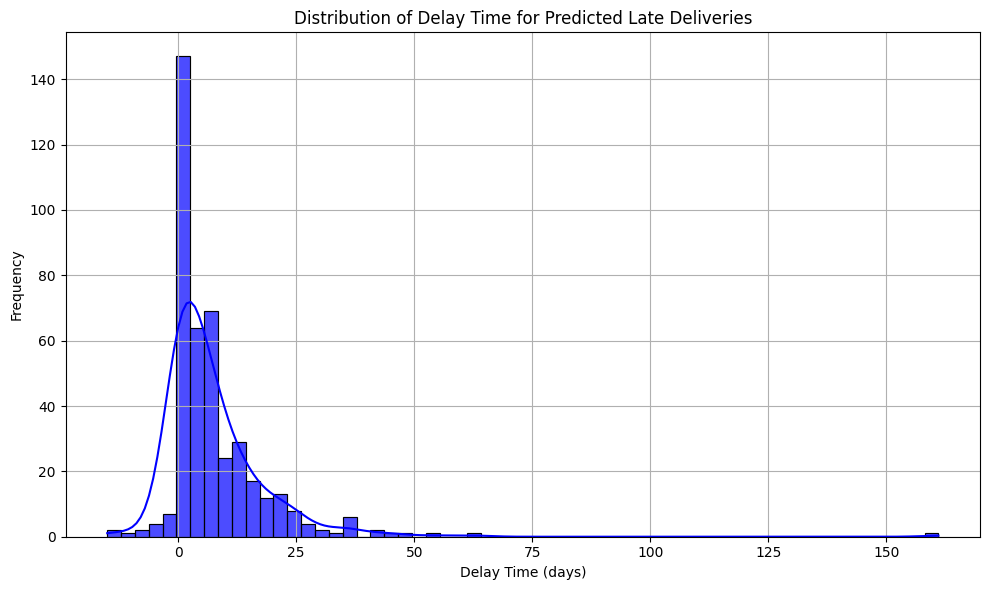

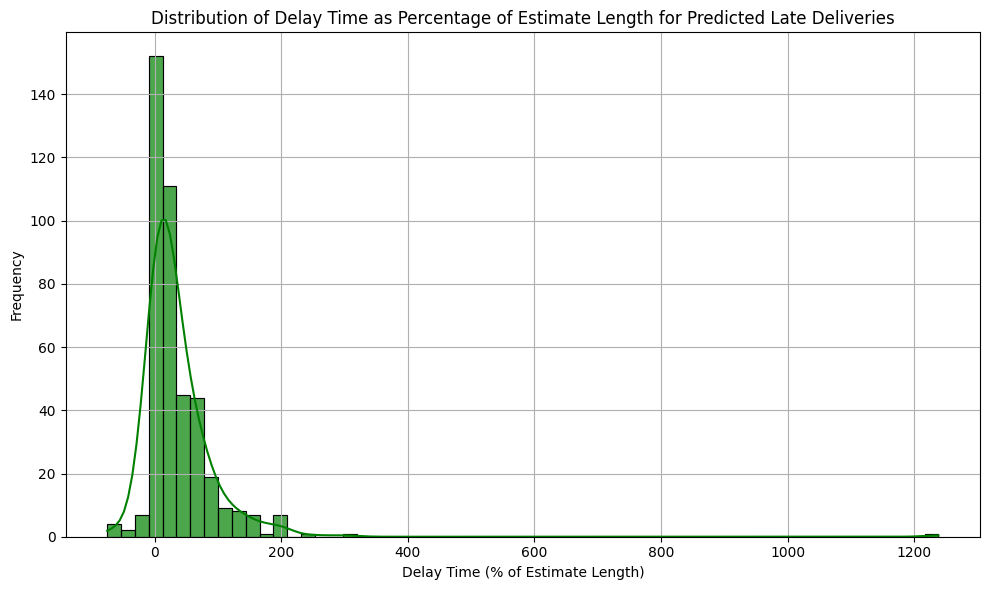

In [296]:
# want to see the delay distribution for those that were predicted. How much to extend the duration?
# in days and in percentage
# Filter the dataframe where y_pred is 1
predicted_late_df = X_test[y_pred == 1]

# Get the customer_unique_id for these predictions
predicted_late_df_full = machine_learning.loc[predicted_late_df.index]
predicted_late_df_full.head()
plt.figure(figsize=(10, 6))
sns.histplot(predicted_late_df_full['delay_time'], bins=60, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Delay Time for Predicted Late Deliveries')
plt.xlabel('Delay Time (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate delay time as a percentage of estimate length
predicted_late_df_full['delay_percentage'] = (predicted_late_df_full['delay_time'] / predicted_late_df_full['estimate_length']) * 100

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(predicted_late_df_full['delay_percentage'], bins=60, kde=True, color='green', alpha=0.7)
plt.title('Distribution of Delay Time as Percentage of Estimate Length for Predicted Late Deliveries')
plt.xlabel('Delay Time (% of Estimate Length)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [282]:
# dropping categoricals alltogether
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

machine_learning = pd.read_csv('../data_csv/machine_learning_1.csv')
machine_learning = machine_learning.merge(
    df[['customer_unique_id', 'avg_neighbor_distance_km']],
    on='customer_unique_id',
    how='left'
)
# Create interaction feature: freight value divided by product weight
machine_learning['freight_per_weight'] = machine_learning.apply(
    lambda row: row['freight_value'] / row['total_order_weight'] if row['total_order_weight'] > 0 and pd.notnull(row['total_order_weight']) else np.nan,
    axis=1
)

# Include the new features in the feature set
features = ['unique_seller_count', 'delivery_time_buffer', 'product_count', 'estimate_length', 'freight_value', 'freight_per_weight', 'price', 'distance', 'same_state', 'same_city', 'avg_neighbor_distance_km']
X = machine_learning[features].dropna()
y = machine_learning.loc[X.index, 'late']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



# Note, adding the customer and seller states may add too many features and lowers model performance
# perhaps, we can change the customer state to regional columns.

Accuracy: 0.9384045775833053

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     21908
           1       0.93      0.23      0.37      1860

    accuracy                           0.94     23768
   macro avg       0.93      0.61      0.67     23768
weighted avg       0.94      0.94      0.92     23768



In [285]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(20))

distance                          0.146025
estimate_length                   0.137135
freight_per_weight                0.126891
freight_value                     0.123327
price                             0.122442
avg_neighbor_distance_km          0.107377
delivery_time_buffer              0.069706
same_state                        0.010147
category_health_beauty            0.008408
product_count                     0.008404
category_computers_accessories    0.008358
category_furniture_decor          0.008261
category_sports_leisure           0.008167
category_bed_bath_table           0.007276
unique_seller_count               0.006443
category_housewares               0.006151
category_toys                     0.006032
category_watches_gifts            0.006009
category_auto                     0.005989
category_telephony                0.005299
dtype: float64


In [278]:
# Filter the dataframe where y_pred is 1
predicted_late_df = X_test[y_pred == 1]

# Display the filtered dataframe
predicted_late_df.head()

,unique_seller_count,delivery_time_buffer,product_count,estimate_length,freight_value,freight_per_weight,price,distance,same_state,same_city,...,category_security_and_services,category_signaling_and_security,category_small_appliances,category_small_appliances_home_oven_and_coffee,category_sports_leisure,category_stationery,category_tablets_printing_image,category_telephony,category_toys,category_watches_gifts
60612,1,5,3,11,7.89,0.000464,1.20,38.505499,1,1,...,False,False,False,False,False,False,False,False,False,False
71430,1,6,1,21,15.19,0.006329,69.90,161.234798,0,0,...,False,False,False,False,False,False,False,False,False,False
69470,1,9,1,12,7.78,0.051867,18.99,48.651543,1,0,...,False,False,False,False,False,False,False,False,False,False
45198,1,6,1,20,16.17,0.023100,59.00,781.138690,0,0,...,False,False,False,False,False,False,False,False,False,False
90297,1,12,1,14,32.93,0.000832,99.00,56.020032,1,0,...,False,False,False,False,False,False,False,False,False,False


In [266]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

machine_learning = pd.read_csv('../data_csv/machine_learning_1.csv')
machine_learning = machine_learning.merge(
    df[['customer_unique_id', 'avg_neighbor_distance_km']],
    on='customer_unique_id',
    how='left'
)
# Create interaction feature: freight value divided by product weight
machine_learning['freight_per_weight'] = machine_learning.apply(
    lambda row: row['freight_value'] / row['product_weight_g'] if row['product_weight_g'] > 0 and pd.notnull(row['product_weight_g']) else np.nan,
    axis=1
)
# Fix right-skewed features using log transformation
skewed_features = ['price', 'distance', 'product_weight_g', 'freight_per_weight', 'freight_value', 'avg_neighbor_distance_km']
for feature in skewed_features:
    machine_learning[feature] = machine_learning[feature].apply(lambda x: np.log1p(x) if x > 0 else 0)

# Include the new features in the feature set
features = ['unique_seller_count', 'delivery_time_buffer', 'product_count', 'seller_state', 'customer_state', 'route', 'estimate_length', 'freight_value', 'product_weight_g', 'price', 'distance', 'category', 'same_state', 'same_city', 'avg_neighbor_distance_km',]
X = pd.get_dummies(machine_learning[features].dropna(), columns=['seller_state', 'customer_state', 'route', 'category'])
y = machine_learning.loc[X.index, 'late']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9396255254107757

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     21758
           1       0.92      0.23      0.37      1795

    accuracy                           0.94     23553
   macro avg       0.93      0.61      0.67     23553
weighted avg       0.94      0.94      0.92     23553



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Load and merge data
machine_learning = pd.read_csv('../data_csv/machine_learning_1.csv')
machine_learning = machine_learning.merge(
    df[['customer_unique_id', 'avg_neighbor_distance_km']],
    on='customer_unique_id',
    how='left'
)

# Define features
features = ['unique_seller_count', 'delivery_time_buffer', 'product_count', 'seller_state',
            'customer_state', 'route', 'estimate_length', 'freight_value', 'product_weight_g',
            'price', 'distance', 'category', 'same_state', 'same_city', 'avg_neighbor_distance_km']

# One-hot encode categorical features
X = pd.get_dummies(machine_learning[features].dropna(), columns=['seller_state', 'customer_state', 'route', 'category'])

# Target variable: continuous delay_time
y = machine_learning.loc[X.index, 'delay_time']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Evaluate model
print("RMSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



RMSE: 60.6156640270525
MAE: 4.96516117458986
R2 Score: 0.37740002542393114


/opt/anaconda3/envs/olist/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/olist/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/olist/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [269]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(20))

estimate_length                   0.120766
distance                          0.108413
freight_per_weight                0.093830
freight_value                     0.092920
price                             0.092649
total_order_weight                0.085018
avg_neighbor_distance_km          0.083022
delivery_time_buffer              0.062896
product_count                     0.008604
category_sports_leisure           0.007669
category_health_beauty            0.007268
category_furniture_decor          0.007257
category_computers_accessories    0.007207
category_bed_bath_table           0.006993
customer_state_RJ                 0.006531
customer_state_SP                 0.006223
category_housewares               0.006120
category_toys                     0.005290
route_SPRJ                        0.005213
unique_seller_count               0.005155
dtype: float64


In [250]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load data
machine_learning = pd.read_csv('../data_csv/machine_learning_1.csv')
machine_learning = machine_learning.merge(
    df[['customer_unique_id', 'avg_neighbor_distance_km']],
    on='customer_unique_id',
    how='left'
)

# Define features
features = ['unique_seller_count', 'delivery_time_buffer', 'product_count', 'seller_state',
            'customer_state', 'route', 'estimate_length', 'freight_value', 'product_weight_g',
            'price', 'distance', 'category', 'same_state', 'same_city', 'avg_neighbor_distance_km']

# One-hot encode categorical features
X = pd.get_dummies(machine_learning[features].dropna(), columns=['seller_state', 'customer_state', 'route', 'category'])

# Define target
y = machine_learning.loc[X.index, 'late']

# Split before oversampling to prevent leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to training data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Train Random Forest on oversampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9302960498251003

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     21627
           1       0.61      0.28      0.39      1815

    accuracy                           0.93     23442
   macro avg       0.77      0.63      0.67     23442
weighted avg       0.92      0.93      0.92     23442



In [218]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

machine_learning = pd.read_csv('../data_csv/machine_learning_1.csv')

# Include the new features in the feature set
features = ['unique_seller_count', 'delivery_time_buffer', 'product_count', 'customer_state', 'estimate_length', 'freight_value', 'product_weight_g', 'price', 'distance', 'category', 'same_state', 'same_city']
X = pd.get_dummies(machine_learning[features].dropna(), columns=['customer_state', 'category'])
y = machine_learning.loc[X.index, 'late']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
# Get prediction probabilities
# use this to improve estimate times
# if low risk, reduce time by percentage
# if high risk, increase time by percentage
y_pred_proba = clf.predict_proba(X_test)[:, 1]


# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9323961897715712

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     19928
           1       0.84      0.17      0.28      1698

    accuracy                           0.93     21626
   macro avg       0.89      0.58      0.62     21626
weighted avg       0.93      0.93      0.91     21626



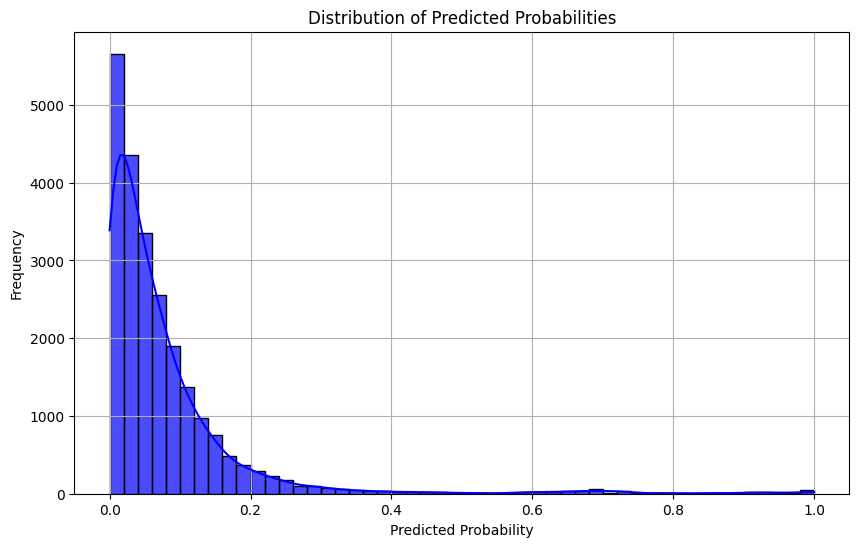

In [286]:
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba, bins=50, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [292]:
# Filter rows where y_pred_proba is above a threshold
high_proba_indices = y_pred_proba > 0.5
low_proba_indices = y_pred_proba < 0.5
# Count the number of true positives and false positives
true_positives = ((y_test == 1) & high_proba_indices).sum()
false_positives = ((y_test == 0) & high_proba_indices).sum()

true_negatives = ((y_test == 0) & low_proba_indices).sum()
false_negatives = ((y_test == 1) & low_proba_indices).sum()

print(f"True Positives: {true_positives}")
print(f"False Positives: {false_positives}")
print(f"True Negatives: {true_negatives}")
print(f"False Negatives: {false_negatives}")

True Positives: 402
False Positives: 17
True Negatives: 21582
False Negatives: 1432


In [204]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

machine_learning = pd.read_csv('../data_csv/machine_learning.csv')

# Include the new features in the feature set
features = ['route', 'estimate_length', 'seller_state', 'customer_state']
X = pd.get_dummies(machine_learning[features].dropna(), columns=['route','seller_state', 'customer_state'])
y = machine_learning.loc[X.index, 'late']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9176950998185118

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     20273
           1       0.32      0.02      0.04      1767

    accuracy                           0.92     22040
   macro avg       0.62      0.51      0.50     22040
weighted avg       0.87      0.92      0.88     22040



In [203]:
machine_learning.head()


,seller_state,customer_state,route,estimate_length,freight_value,product_weight_g,price,distance,category,late
0,SP,RJ,SPRJ,15,13.29,650.0,58.90,301.229205,cool_stuff,0
1,SP,SP,SPSP,18,19.93,30000.0,239.90,588.404069,pet_shop,0
2,MG,MG,MGMG,21,17.87,3050.0,199.00,312.835023,furniture_decor,0
3,SP,SP,SPSP,11,12.79,200.0,12.99,295.032480,perfumery,0
4,PR,SP,PRSP,40,18.14,3750.0,199.90,646.468544,garden_tools,0


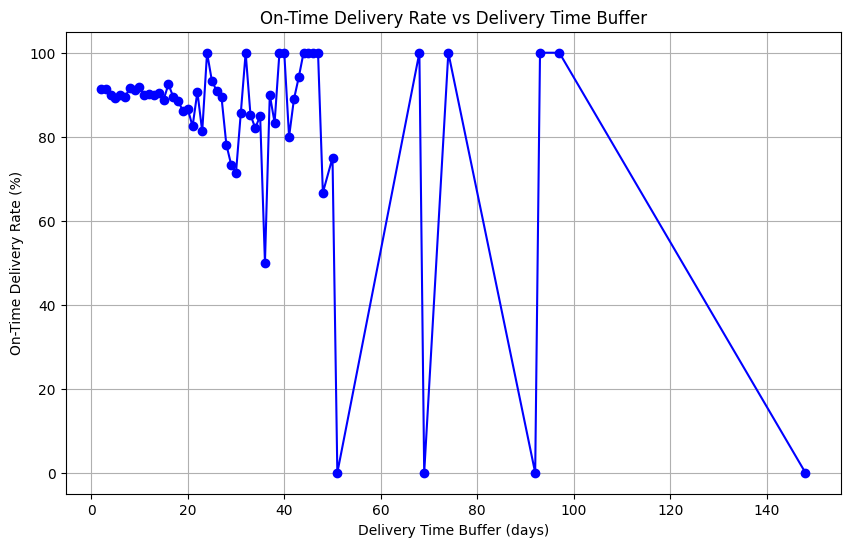

/var/folders/vc/ydqs1m4s6w35gmq4jfdzwvxw0000gn/T/ipykernel_9398/1810846740.py:254: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucketed_data = df.groupby('delivery_time_bucket')['on_time_delivery_rate'].mean().reset_index()


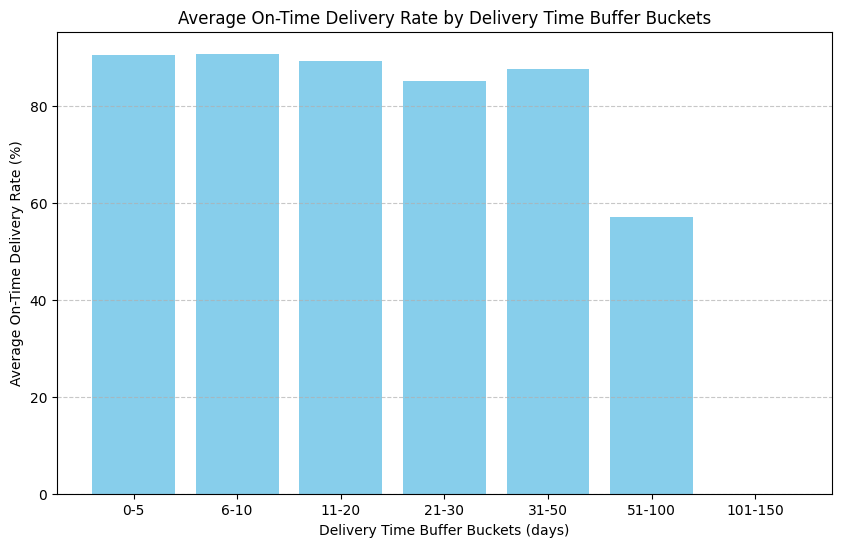

In [209]:
import pandas as pd

json =[
  {
    "delivery_time_buffer": "2",
    "on_time_delivery_rate": "91.3483857353872125"
  },
  {
    "delivery_time_buffer": "3",
    "on_time_delivery_rate": "91.4356787491115849"
  },
  {
    "delivery_time_buffer": "4",
    "on_time_delivery_rate": "90.0257772634015466"
  },
  {
    "delivery_time_buffer": "5",
    "on_time_delivery_rate": "89.1547464239271782"
  },
  {
    "delivery_time_buffer": "6",
    "on_time_delivery_rate": "90.0021277727538699"
  },
  {
    "delivery_time_buffer": "7",
    "on_time_delivery_rate": "89.4950588872343306"
  },
  {
    "delivery_time_buffer": "8",
    "on_time_delivery_rate": "91.5495020503807850"
  },
  {
    "delivery_time_buffer": "9",
    "on_time_delivery_rate": "91.0879067508499271"
  },
  {
    "delivery_time_buffer": "10",
    "on_time_delivery_rate": "91.8580375782881002"
  },
  {
    "delivery_time_buffer": "11",
    "on_time_delivery_rate": "90.0437636761487965"
  },
  {
    "delivery_time_buffer": "12",
    "on_time_delivery_rate": "90.2202072538860104"
  },
  {
    "delivery_time_buffer": "13",
    "on_time_delivery_rate": "89.9197145405887600"
  },
  {
    "delivery_time_buffer": "14",
    "on_time_delivery_rate": "90.4990403071017274"
  },
  {
    "delivery_time_buffer": "15",
    "on_time_delivery_rate": "88.8188976377952756"
  },
  {
    "delivery_time_buffer": "16",
    "on_time_delivery_rate": "92.4882629107981221"
  },
  {
    "delivery_time_buffer": "17",
    "on_time_delivery_rate": "89.4557823129251701"
  },
  {
    "delivery_time_buffer": "18",
    "on_time_delivery_rate": "88.5135135135135135"
  },
  {
    "delivery_time_buffer": "19",
    "on_time_delivery_rate": "86.1538461538461538"
  },
  {
    "delivery_time_buffer": "20",
    "on_time_delivery_rate": "86.6412213740458015"
  },
  {
    "delivery_time_buffer": "21",
    "on_time_delivery_rate": "82.4675324675324675"
  },
  {
    "delivery_time_buffer": "22",
    "on_time_delivery_rate": "90.6976744186046512"
  },
  {
    "delivery_time_buffer": "23",
    "on_time_delivery_rate": "81.2500000000000000"
  },
  {
    "delivery_time_buffer": "24",
    "on_time_delivery_rate": "100.0000000000000000"
  },
  {
    "delivery_time_buffer": "25",
    "on_time_delivery_rate": "93.3333333333333333"
  },
  {
    "delivery_time_buffer": "26",
    "on_time_delivery_rate": "90.9090909090909091"
  },
  {
    "delivery_time_buffer": "27",
    "on_time_delivery_rate": "89.3617021276595745"
  },
  {
    "delivery_time_buffer": "28",
    "on_time_delivery_rate": "78.1250000000000000"
  },
  {
    "delivery_time_buffer": "29",
    "on_time_delivery_rate": "73.3333333333333333"
  },
  {
    "delivery_time_buffer": "30",
    "on_time_delivery_rate": "71.4285714285714286"
  },
  {
    "delivery_time_buffer": "31",
    "on_time_delivery_rate": "85.7142857142857143"
  },
  {
    "delivery_time_buffer": "32",
    "on_time_delivery_rate": "100.0000000000000000"
  },
  {
    "delivery_time_buffer": "33",
    "on_time_delivery_rate": "85.1851851851851852"
  },
  {
    "delivery_time_buffer": "34",
    "on_time_delivery_rate": "82.0512820512820513"
  },
  {
    "delivery_time_buffer": "35",
    "on_time_delivery_rate": "85.0000000000000000"
  },
  {
    "delivery_time_buffer": "36",
    "on_time_delivery_rate": "50.0000000000000000"
  },
  {
    "delivery_time_buffer": "37",
    "on_time_delivery_rate": "90.0000000000000000"
  },
  {
    "delivery_time_buffer": "38",
    "on_time_delivery_rate": "83.3333333333333333"
  },
  {
    "delivery_time_buffer": "39",
    "on_time_delivery_rate": "100.0000000000000000"
  },
  {
    "delivery_time_buffer": "40",
    "on_time_delivery_rate": "100.0000000000000000"
  },
  {
    "delivery_time_buffer": "41",
    "on_time_delivery_rate": "80.0000000000000000"
  },
  {
    "delivery_time_buffer": "42",
    "on_time_delivery_rate": "88.8888888888888889"
  },
  {
    "delivery_time_buffer": "43",
    "on_time_delivery_rate": "94.1176470588235294"
  },
  {
    "delivery_time_buffer": "44",
    "on_time_delivery_rate": "100.0000000000000000"
  },
  {
    "delivery_time_buffer": "45",
    "on_time_delivery_rate": "100.0000000000000000"
  },
  {
    "delivery_time_buffer": "46",
    "on_time_delivery_rate": "100.0000000000000000"
  },
  {
    "delivery_time_buffer": "47",
    "on_time_delivery_rate": "100.0000000000000000"
  },
  {
    "delivery_time_buffer": "48",
    "on_time_delivery_rate": "66.6666666666666667"
  },
  {
    "delivery_time_buffer": "50",
    "on_time_delivery_rate": "75.0000000000000000"
  },
  {
    "delivery_time_buffer": "51",
    "on_time_delivery_rate": "0.00000000000000000000"
  },
  {
    "delivery_time_buffer": "68",
    "on_time_delivery_rate": "100.0000000000000000"
  },
  {
    "delivery_time_buffer": "69",
    "on_time_delivery_rate": "0.00000000000000000000"
  },
  {
    "delivery_time_buffer": "74",
    "on_time_delivery_rate": "100.0000000000000000"
  },
  {
    "delivery_time_buffer": "92",
    "on_time_delivery_rate": "0.00000000000000000000"
  },
  {
    "delivery_time_buffer": "93",
    "on_time_delivery_rate": "100.0000000000000000"
  },
  {
    "delivery_time_buffer": "97",
    "on_time_delivery_rate": "100.0000000000000000"
  },
  {
    "delivery_time_buffer": "148",
    "on_time_delivery_rate": "0.00000000000000000000"
  },
]
import matplotlib.pyplot as plt

# Convert JSON to DataFrame
df = pd.DataFrame(json)

# Convert columns to appropriate data types
df['delivery_time_buffer'] = pd.to_numeric(df['delivery_time_buffer'], errors='coerce')
df['on_time_delivery_rate'] = pd.to_numeric(df['on_time_delivery_rate'], errors='coerce')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['delivery_time_buffer'], df['on_time_delivery_rate'], marker='o', linestyle='-', color='b')
plt.title('On-Time Delivery Rate vs Delivery Time Buffer')
plt.xlabel('Delivery Time Buffer (days)')
plt.ylabel('On-Time Delivery Rate (%)')
plt.grid(True)
plt.show()
# Define buckets for delivery time buffer
bins = [0, 5, 10, 20, 30, 50, 100, 150]
labels = ['0-5', '6-10', '11-20', '21-30', '31-50', '51-100', '101-150']

# Create a new column for the buckets
df['delivery_time_bucket'] = pd.cut(df['delivery_time_buffer'], bins=bins, labels=labels, right=True)

# Group by the buckets and calculate the mean on-time delivery rate
bucketed_data = df.groupby('delivery_time_bucket')['on_time_delivery_rate'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(bucketed_data['delivery_time_bucket'], bucketed_data['on_time_delivery_rate'], color='skyblue')
plt.title('Average On-Time Delivery Rate by Delivery Time Buffer Buckets')
plt.xlabel('Delivery Time Buffer Buckets (days)')
plt.ylabel('Average On-Time Delivery Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()